<a href="https://colab.research.google.com/github/comparativechrono/VariantFold/blob/main/notebooks/AA_mutator_AlphaFold2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/sokrypton/ColabFold/main/.github/ColabFold_Marv_Logo_Small.png" height="200" align="right" style="height:240px">

#VariantFold
##Mutate Amino Acid sequence and push into ColabFold v1.5.2: AlphaFold2 using MMseqs2

**The alphafold section of this notebook is derived from:**
*   Easy to use protein structure and complex prediction using [AlphaFold2](https://www.nature.com/articles/s41586-021-03819-2) and [Alphafold2-multimer](https://www.biorxiv.org/content/10.1101/2021.10.04.463034v1). Sequence alignments/templates are generated through [MMseqs2](mmseqs.com) and [HHsearch](https://github.com/soedinglab/hh-suite). For more details, see <a href="#Instructions">bottom</a> of the notebook, checkout the [ColabFold GitHub](https://github.com/sokrypton/ColabFold) and read the manuscript. 
*   [Mirdita M, Schütze K, Moriwaki Y, Heo L, Ovchinnikov S, Steinegger M. ColabFold: Making protein folding accessible to all.
Nature Methods, 2022](https://www.nature.com/articles/s41592-022-01488-1) 


**Advice for using this notebook:**
*   Structural prediction with alphafold is computationally intensive. Ideally this notebook should be run on premium GPUs.

**Input files required:**


*   input amino acid sequence for POI named "original_sequence.txt"
*   input variant table named "variants_table.txt"





In [ ]:
#@title Install dependencies
%%bash -s $use_amber $use_templates $python_version

set -e

USE_AMBER=$1
USE_TEMPLATES=$2
PYTHON_VERSION=$3

if [ ! -f COLABFOLD_READY ]; then
  echo "installing colabfold..."
  # install dependencies
  # We have to use "--no-warn-conflicts" because colab already has a lot preinstalled with requirements different to ours
  pip install -q --no-warn-conflicts "colabfold[alphafold-minus-jax] @ git+https://github.com/sokrypton/ColabFold" "tensorflow-cpu==2.11.0"
  pip uninstall -yq jax jaxlib
  pip install -q "jax[cuda]==0.3.25" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


  # for debugging
  ln -s /usr/local/lib/python3.*/dist-packages/colabfold colabfold
  ln -s /usr/local/lib/python3.*/dist-packages/alphafold alphafold
  touch COLABFOLD_READY
fi

# setup conda
if [ ${USE_AMBER} == "True" ] || [ ${USE_TEMPLATES} == "True" ]; then
  if [ ! -f CONDA_READY ]; then
    echo "installing conda..."
    wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
    bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local 2>&1 1>/dev/null
    rm Miniconda3-latest-Linux-x86_64.sh
    touch CONDA_READY
  fi
fi
# setup template search
if [ ${USE_TEMPLATES} == "True" ] && [ ! -f HH_READY ]; then
  echo "installing hhsuite..."
  conda install -y -q -c conda-forge -c bioconda kalign2=2.04 hhsuite=3.3.0 python="${PYTHON_VERSION}" 2>&1 1>/dev/null
  touch HH_READY
fi
# setup openmm for amber refinement
if [ ${USE_AMBER} == "True" ] && [ ! -f AMBER_READY ]; then
  echo "installing amber..."
  conda install -y -q -c conda-forge openmm=7.5.1 python="${PYTHON_VERSION}" pdbfixer cryptography==38.0.4 2>&1 1>/dev/null
  touch AMBER_READY
fi

installing colabfold...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 MB 11.6 MB/s eta 0:00:00


jobname job_5_Q_1a17f
sequence MAEGQITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV
length 152
2023-03-01 16:51:35,843 Running on GPU
2023-03-01 16:51:35,847 Found 4 citations for tools or databases
2023-03-01 16:51:35,847 Query 1/1: job_5_Q_1a17f (length 152)


PENDING:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]

2023-03-01 16:51:36,451 Sleeping for 6s. Reason: PENDING


RUNNING:   4%|▍         | 6/150 [elapsed: 00:07 remaining: 02:52]

2023-03-01 16:51:43,055 Sleeping for 8s. Reason: RUNNING


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:17 remaining: 00:00]


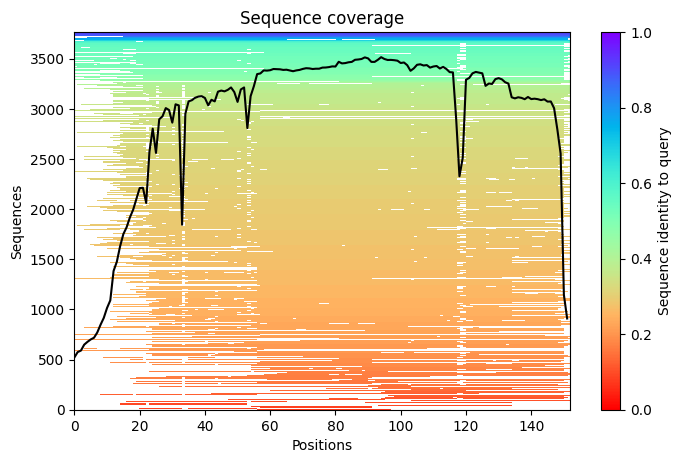

2023-03-01 16:51:53,554 Setting max_seq=512, max_extra_seq=3254
2023-03-01 16:52:19,385 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=89.1 pTM=0.8
2023-03-01 16:52:21,286 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=89.6 pTM=0.804 tol=1.18
2023-03-01 16:52:23,182 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=89.9 pTM=0.809 tol=0.284
2023-03-01 16:52:25,080 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=89.8 pTM=0.807 tol=0.688
2023-03-01 16:52:25,081 alphafold2_ptm_model_1_seed_000 took 25.2s (3 recycles)


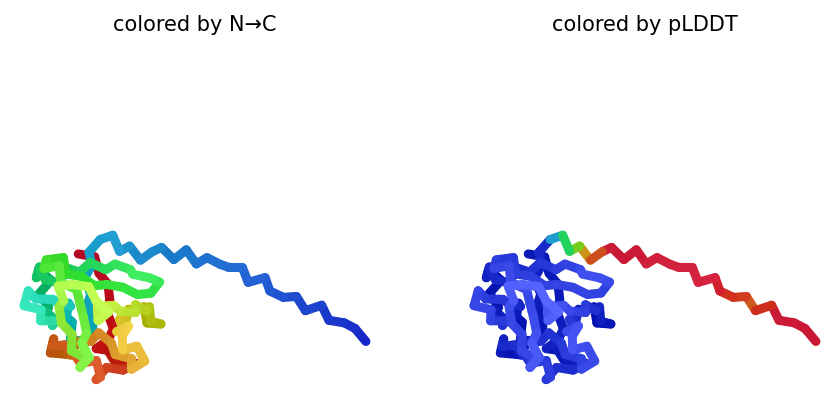

2023-03-01 16:52:27,251 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=89.2 pTM=0.796
2023-03-01 16:52:29,140 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=89.9 pTM=0.801 tol=1.04
2023-03-01 16:52:31,035 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=90.4 pTM=0.809 tol=0.37
2023-03-01 16:52:32,931 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=90.7 pTM=0.812 tol=0.317
2023-03-01 16:52:32,933 alphafold2_ptm_model_2_seed_000 took 7.6s (3 recycles)


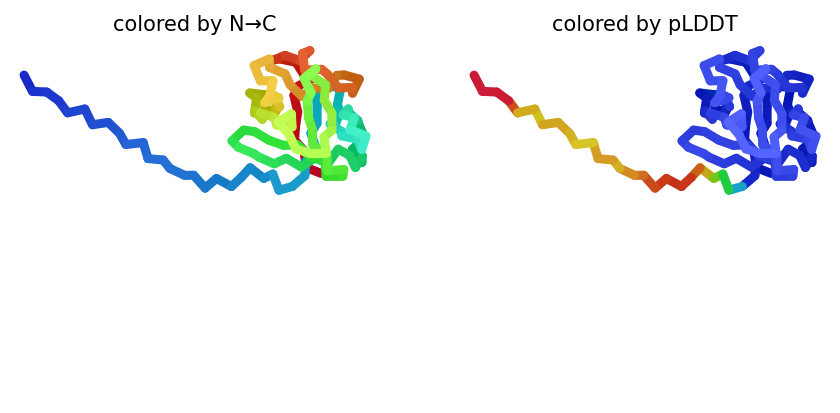

2023-03-01 16:52:35,108 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=88.4 pTM=0.798
2023-03-01 16:52:37,005 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=89 pTM=0.812 tol=1.33
2023-03-01 16:52:38,901 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=88.8 pTM=0.815 tol=0.524
2023-03-01 16:52:40,799 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=89.1 pTM=0.817 tol=0.403
2023-03-01 16:52:40,801 alphafold2_ptm_model_3_seed_000 took 7.6s (3 recycles)


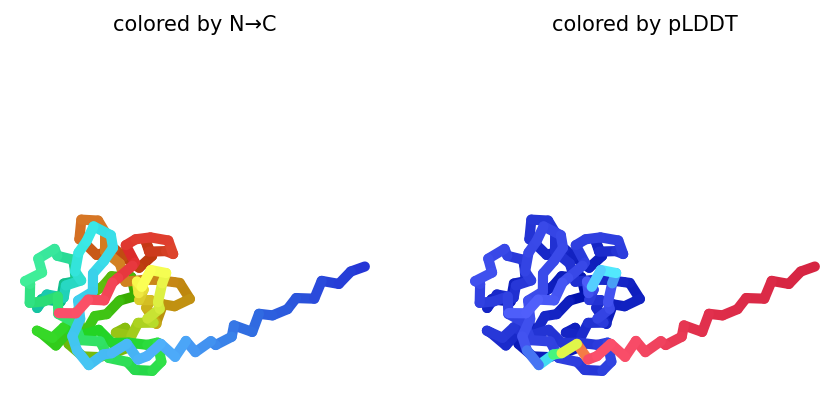

2023-03-01 16:52:43,127 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=88.7 pTM=0.81
2023-03-01 16:52:45,023 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=88.6 pTM=0.814 tol=1.68
2023-03-01 16:52:46,919 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=88.9 pTM=0.817 tol=1.01
2023-03-01 16:52:48,816 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=89.2 pTM=0.816 tol=1.13
2023-03-01 16:52:48,817 alphafold2_ptm_model_4_seed_000 took 7.6s (3 recycles)


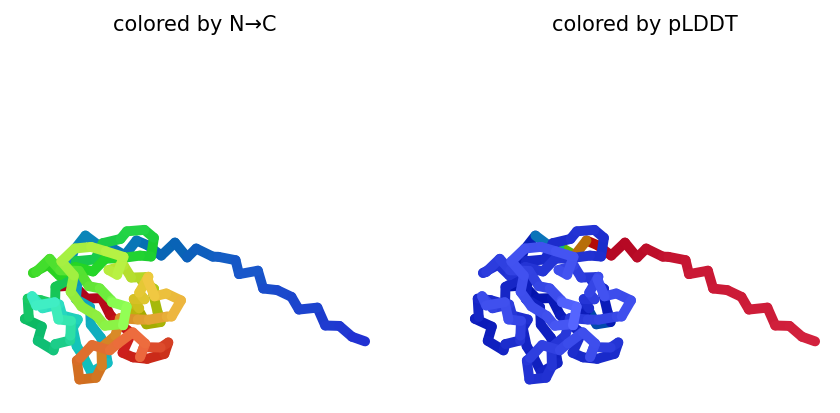

2023-03-01 16:52:50,997 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=88.9 pTM=0.807
2023-03-01 16:52:52,890 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=88.2 pTM=0.808 tol=3.17
2023-03-01 16:52:54,784 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=88.4 pTM=0.812 tol=0.796
2023-03-01 16:52:56,678 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=88.5 pTM=0.811 tol=1.09
2023-03-01 16:52:56,679 alphafold2_ptm_model_5_seed_000 took 7.6s (3 recycles)


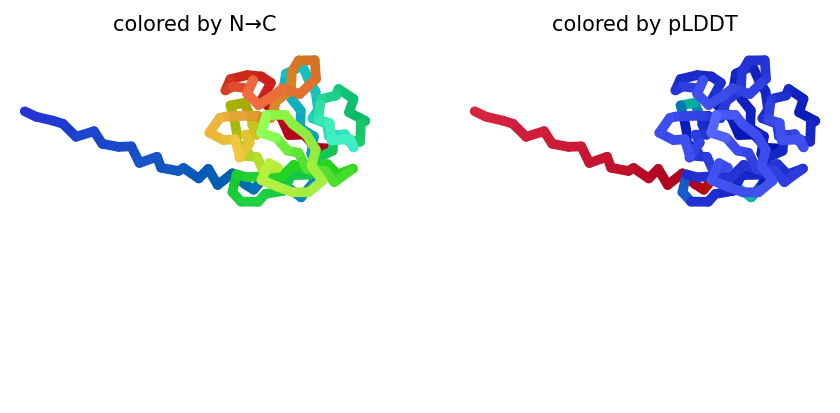

2023-03-01 16:52:56,950 reranking models by 'plddt' metric
2023-03-01 16:52:56,951 rank_001_alphafold2_ptm_model_2_seed_000 pLDDT=90.7 pTM=0.812
2023-03-01 16:52:56,952 rank_002_alphafold2_ptm_model_1_seed_000 pLDDT=89.8 pTM=0.807
2023-03-01 16:52:56,952 rank_003_alphafold2_ptm_model_4_seed_000 pLDDT=89.2 pTM=0.816
2023-03-01 16:52:56,953 rank_004_alphafold2_ptm_model_3_seed_000 pLDDT=89.1 pTM=0.817
2023-03-01 16:52:56,953 rank_005_alphafold2_ptm_model_5_seed_000 pLDDT=88.5 pTM=0.811
2023-03-01 16:52:59,024 Done


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

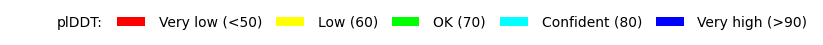


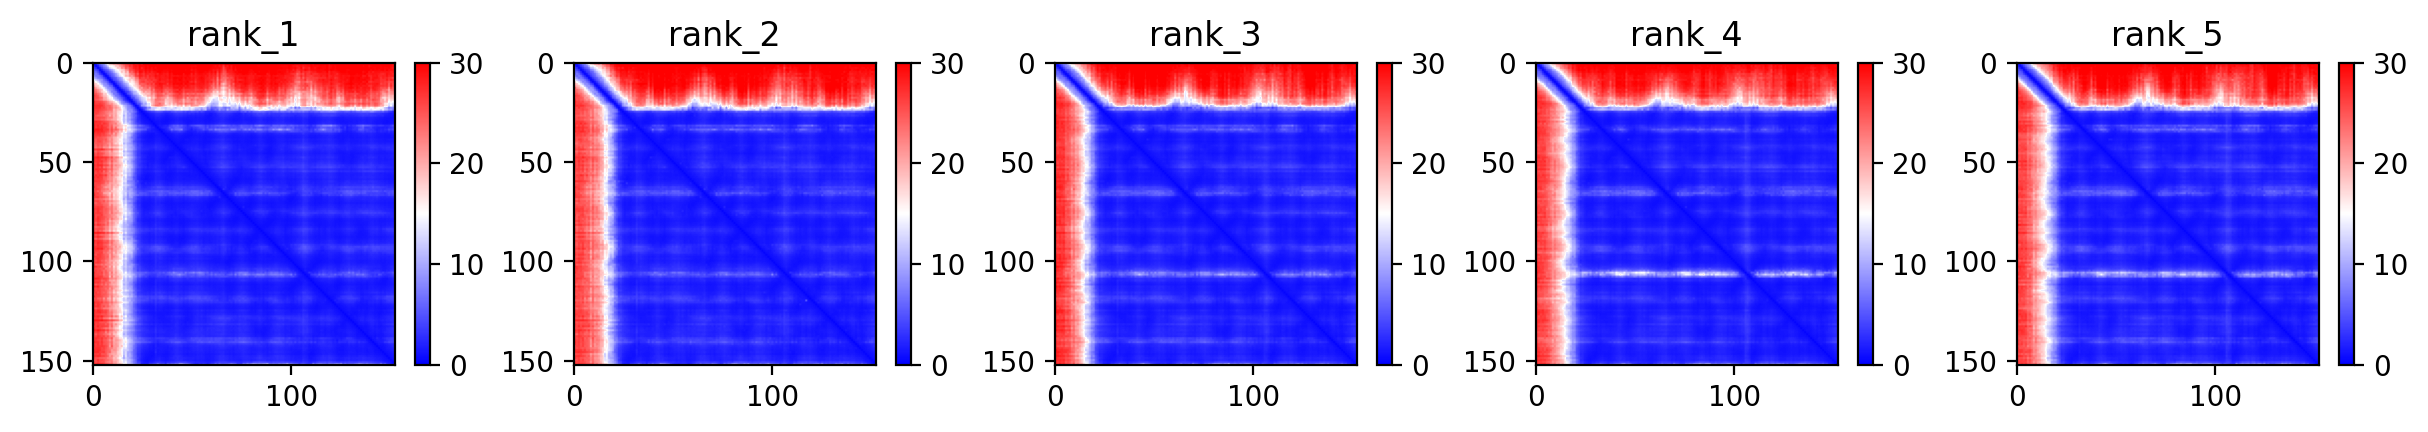
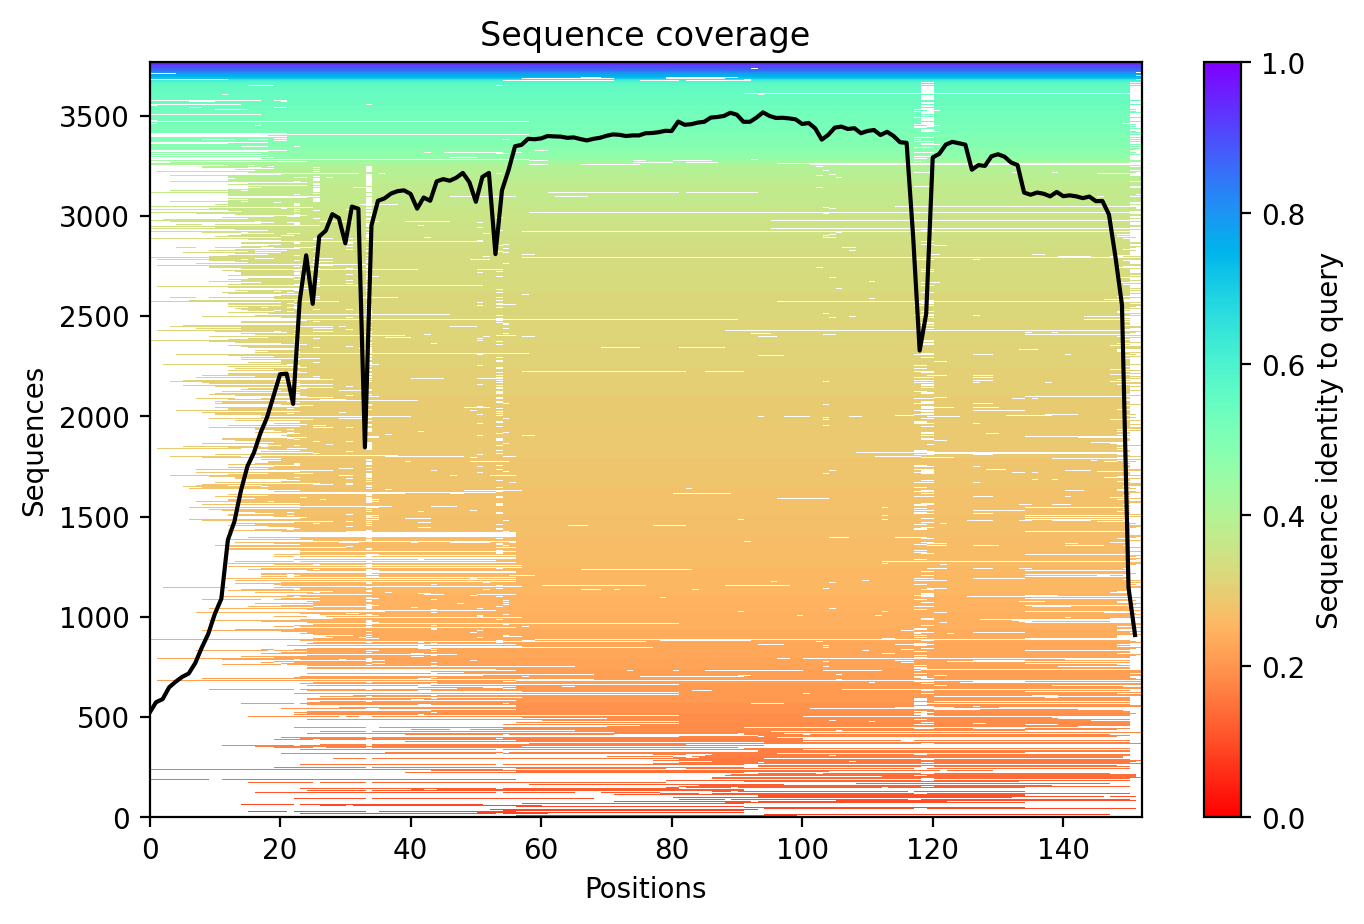
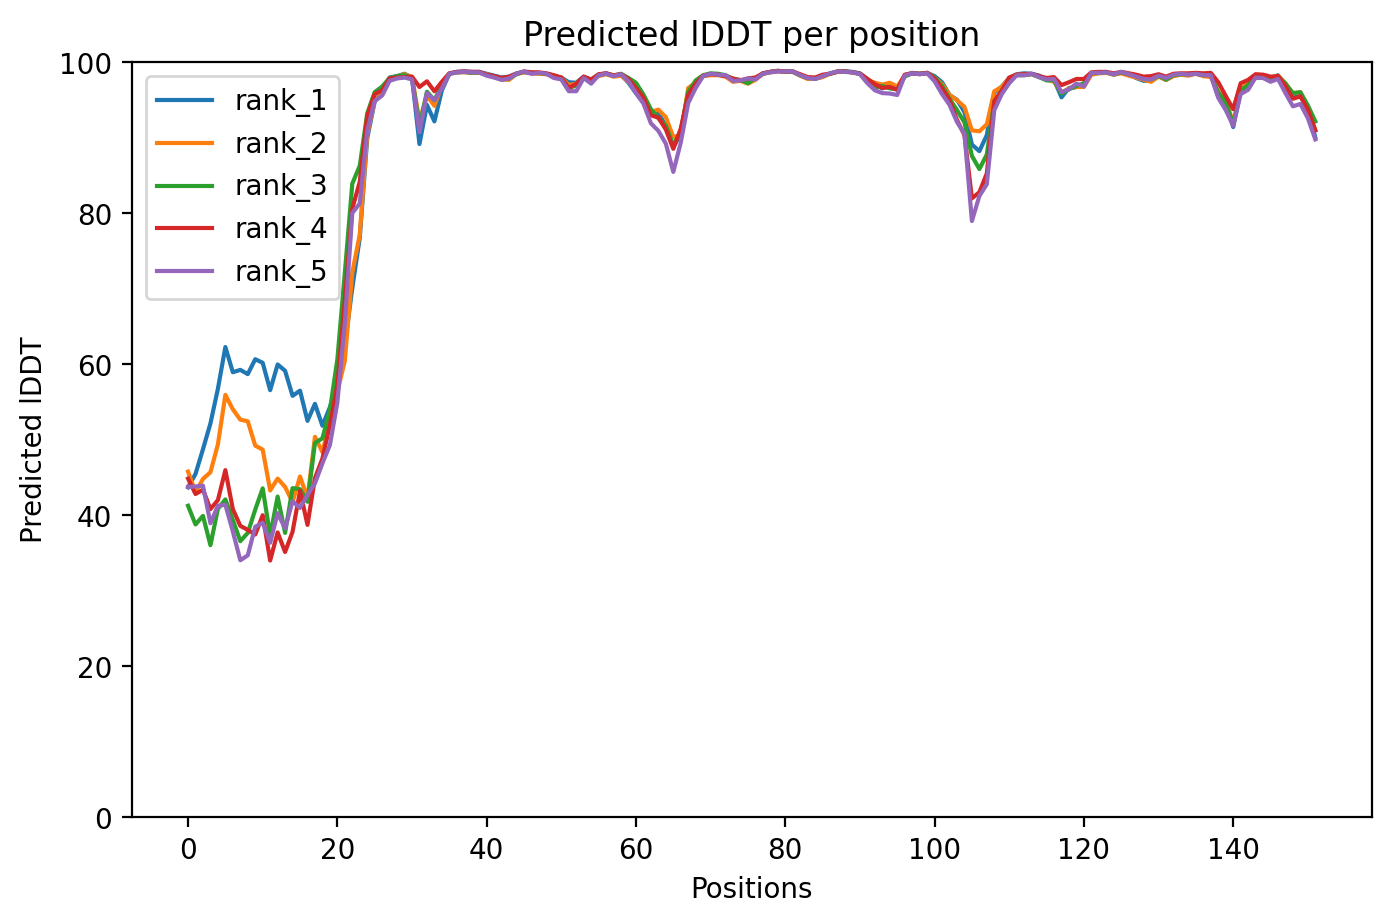

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jobname job_10_W_b5b14
sequence MAEGEITTFWALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV
length 152
2023-03-01 16:52:59,727 Running on GPU
2023-03-01 16:52:59,731 Found 4 citations for tools or databases
2023-03-01 16:52:59,732 Query 1/1: job_10_W_b5b14 (length 152)


PENDING:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]

2023-03-01 16:53:00,343 Sleeping for 10s. Reason: PENDING


RUNNING:   7%|▋         | 10/150 [elapsed: 00:11 remaining: 02:36]

2023-03-01 16:53:10,941 Sleeping for 5s. Reason: RUNNING


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:18 remaining: 00:00]


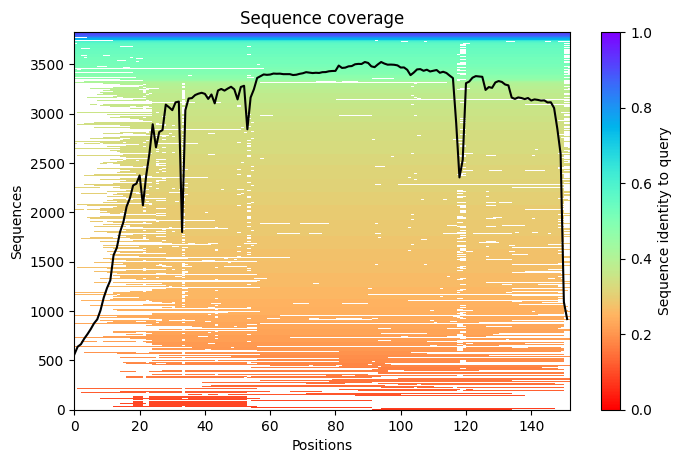

2023-03-01 16:53:18,435 Setting max_seq=512, max_extra_seq=3315
2023-03-01 16:53:44,668 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=88.8 pTM=0.809
2023-03-01 16:53:46,568 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=88.4 pTM=0.801 tol=6.05
2023-03-01 16:53:48,465 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=89.4 pTM=0.805 tol=0.968
2023-03-01 16:53:50,369 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=89.5 pTM=0.81 tol=0.608
2023-03-01 16:53:50,370 alphafold2_ptm_model_1_seed_000 took 25.5s (3 recycles)


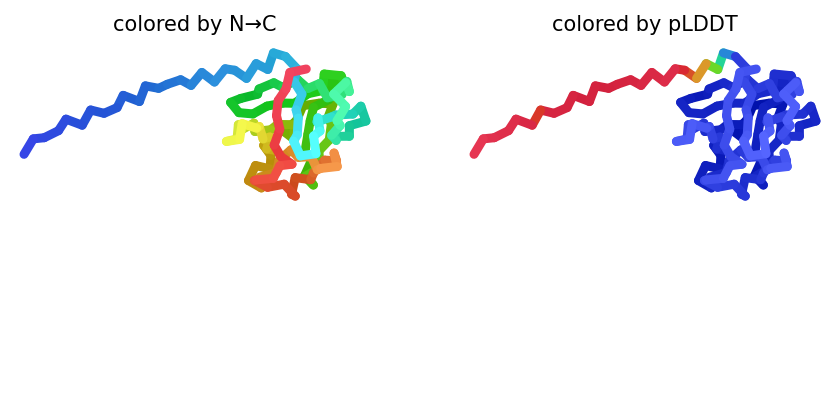

2023-03-01 16:53:52,554 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=89 pTM=0.803
2023-03-01 16:53:54,452 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=89.1 pTM=0.803 tol=6.3
2023-03-01 16:53:56,345 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=89.6 pTM=0.803 tol=0.49
2023-03-01 16:53:58,243 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=89.9 pTM=0.807 tol=0.303
2023-03-01 16:53:58,245 alphafold2_ptm_model_2_seed_000 took 7.6s (3 recycles)


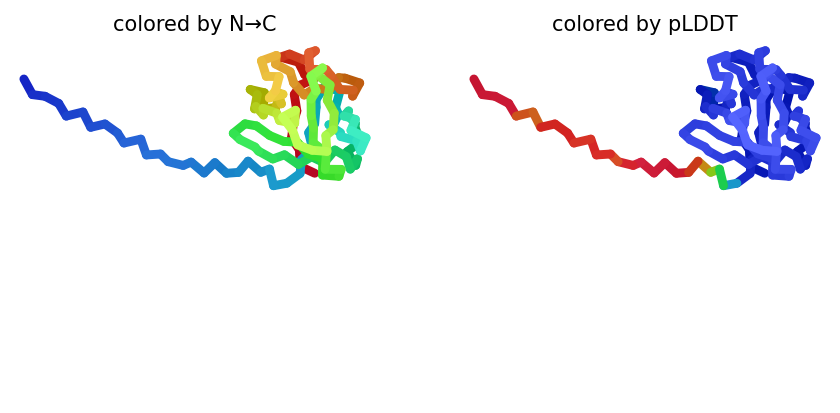

2023-03-01 16:54:00,409 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=89.2 pTM=0.817
2023-03-01 16:54:02,309 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=88.6 pTM=0.812 tol=3.49
2023-03-01 16:54:04,204 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=88.9 pTM=0.813 tol=2.44
2023-03-01 16:54:06,107 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=89.1 pTM=0.82 tol=0.321
2023-03-01 16:54:06,109 alphafold2_ptm_model_3_seed_000 took 7.6s (3 recycles)


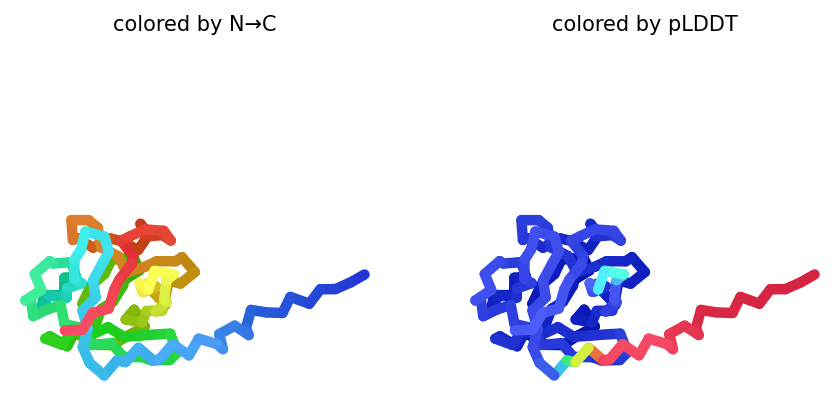

2023-03-01 16:54:08,272 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=88.6 pTM=0.815
2023-03-01 16:54:10,174 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=88.3 pTM=0.812 tol=5.24
2023-03-01 16:54:12,076 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=88.6 pTM=0.812 tol=1.19
2023-03-01 16:54:13,981 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=89.3 pTM=0.82 tol=0.945
2023-03-01 16:54:13,982 alphafold2_ptm_model_4_seed_000 took 7.6s (3 recycles)


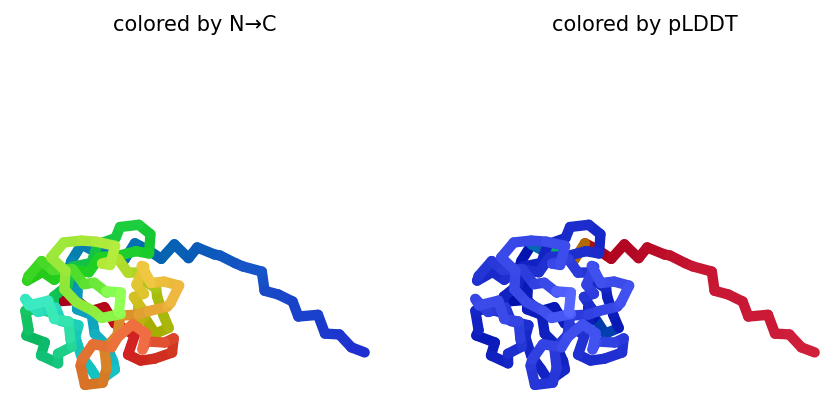

2023-03-01 16:54:16,177 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=88.6 pTM=0.812
2023-03-01 16:54:18,073 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=88.2 pTM=0.806 tol=4.26
2023-03-01 16:54:19,963 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=89 pTM=0.81 tol=2.98
2023-03-01 16:54:21,863 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=89.2 pTM=0.822 tol=1.52
2023-03-01 16:54:21,864 alphafold2_ptm_model_5_seed_000 took 7.6s (3 recycles)


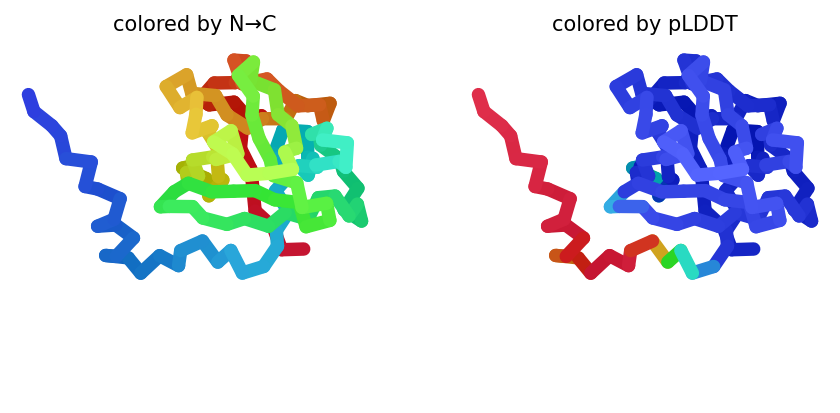

2023-03-01 16:54:22,135 reranking models by 'plddt' metric
2023-03-01 16:54:22,136 rank_001_alphafold2_ptm_model_2_seed_000 pLDDT=89.9 pTM=0.807
2023-03-01 16:54:22,137 rank_002_alphafold2_ptm_model_1_seed_000 pLDDT=89.5 pTM=0.81
2023-03-01 16:54:22,138 rank_003_alphafold2_ptm_model_4_seed_000 pLDDT=89.3 pTM=0.82
2023-03-01 16:54:22,139 rank_004_alphafold2_ptm_model_5_seed_000 pLDDT=89.2 pTM=0.822
2023-03-01 16:54:22,140 rank_005_alphafold2_ptm_model_3_seed_000 pLDDT=89.1 pTM=0.82
2023-03-01 16:54:24,237 Done


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

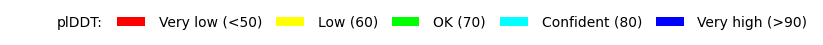


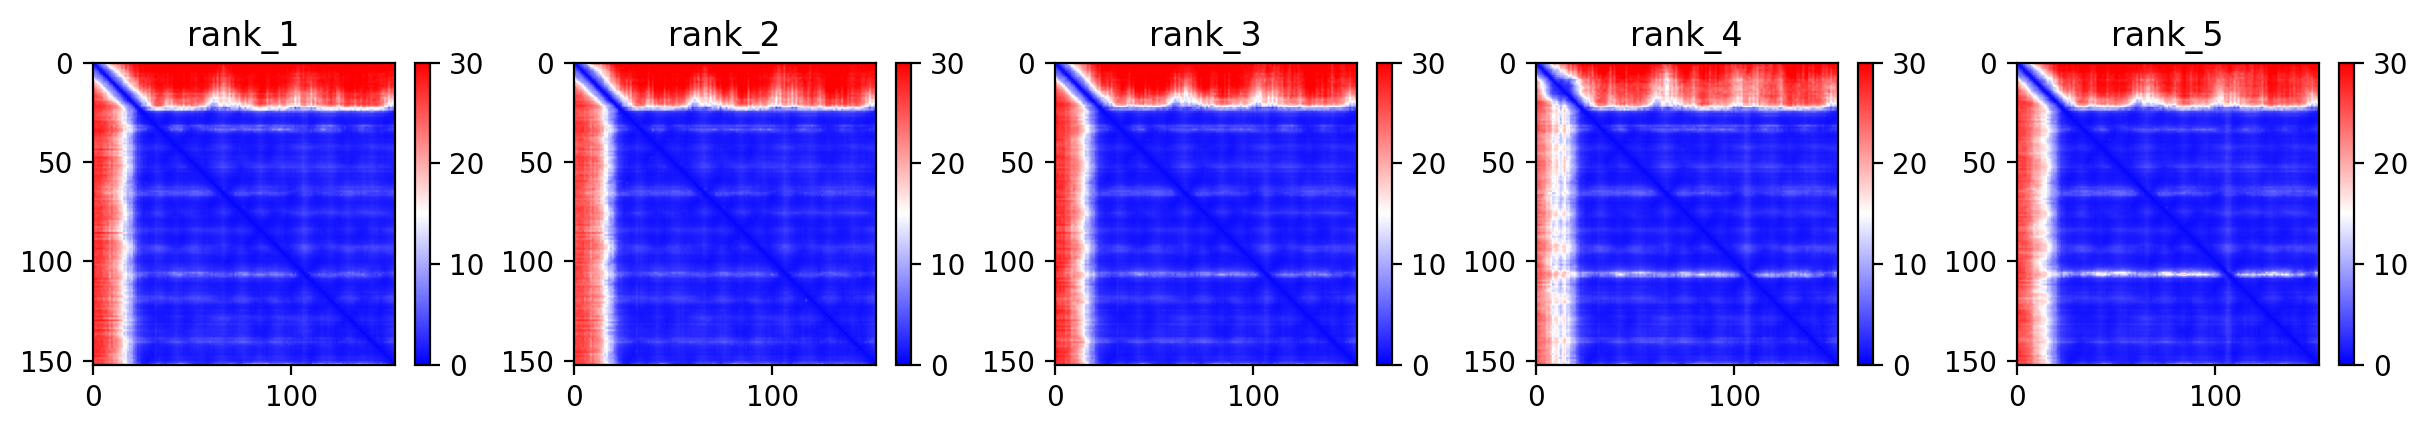
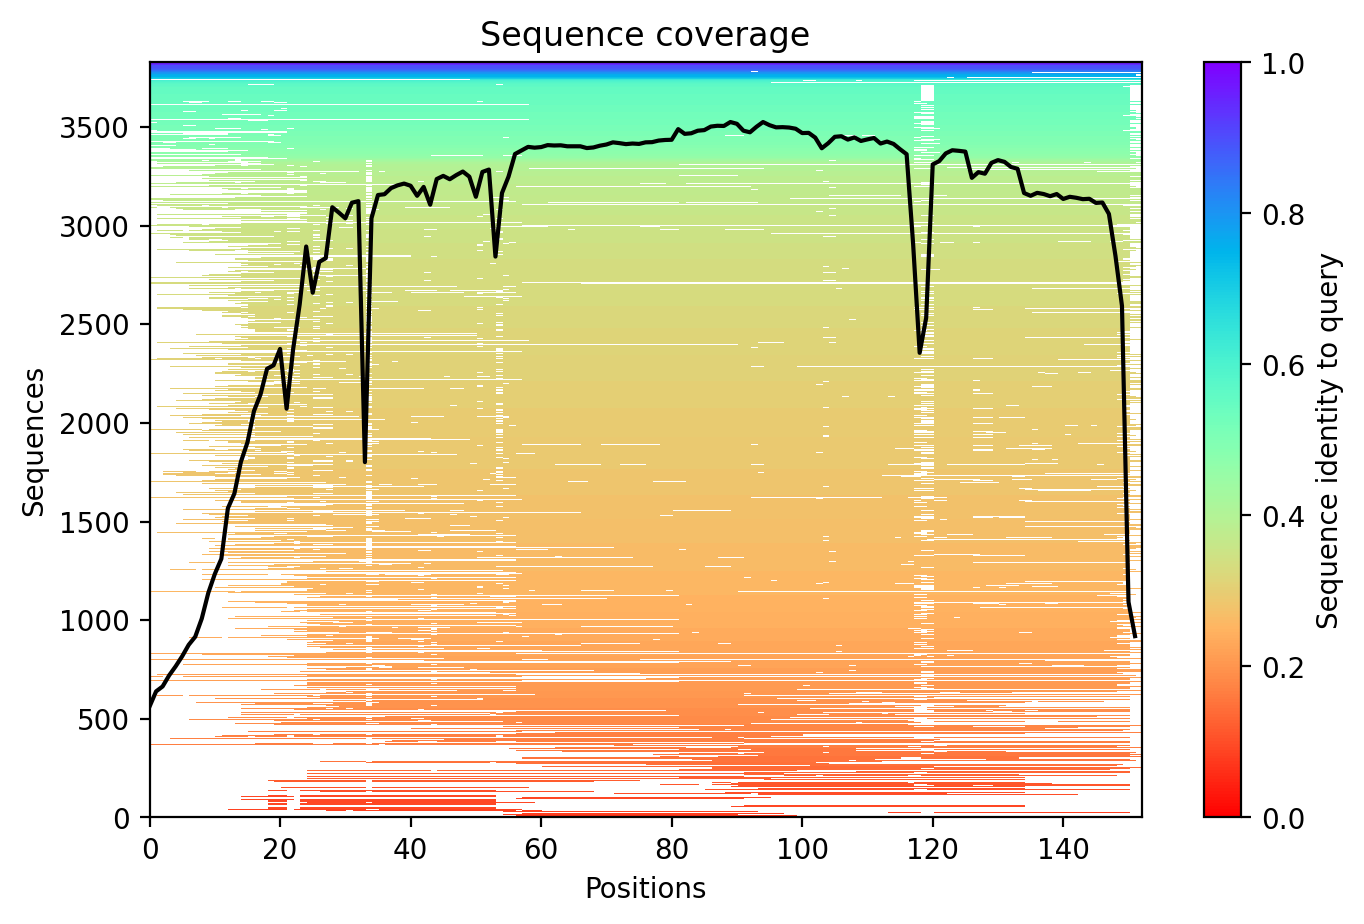
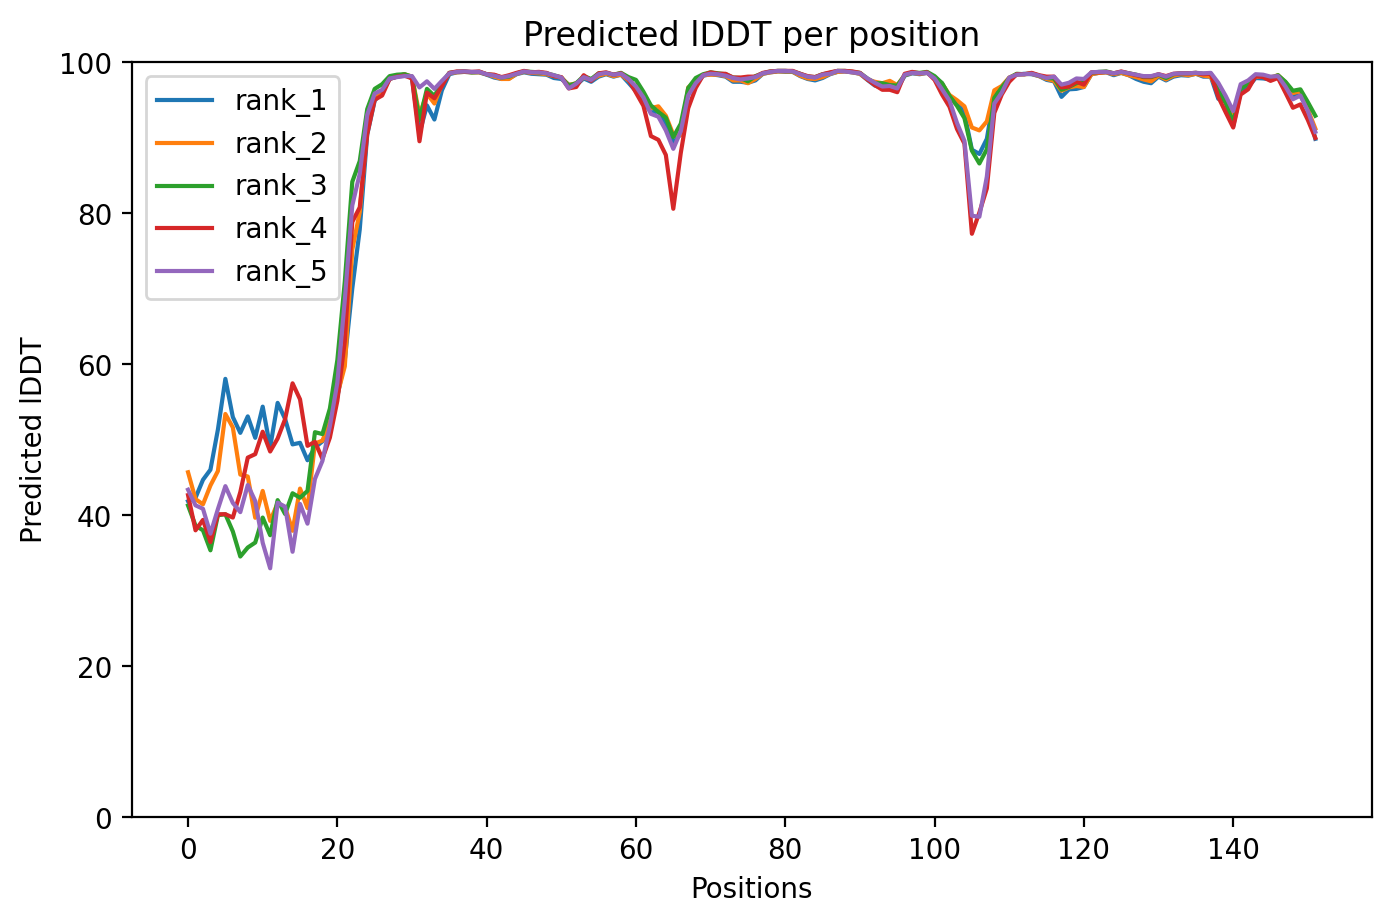

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jobname job_15_R_a6e5b
sequence MAEGEITTFTALTERFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV
length 152
2023-03-01 16:54:24,947 Running on GPU
2023-03-01 16:54:24,952 Found 4 citations for tools or databases
2023-03-01 16:54:24,952 Query 1/1: job_15_R_a6e5b (length 152)


PENDING:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]

2023-03-01 16:54:25,542 Sleeping for 10s. Reason: PENDING


RUNNING:   7%|▋         | 10/150 [elapsed: 00:11 remaining: 02:36]

2023-03-01 16:54:36,138 Sleeping for 6s. Reason: RUNNING


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:19 remaining: 00:00]


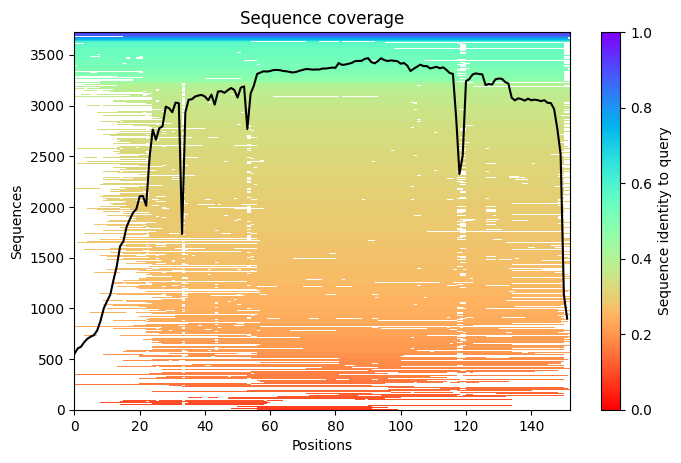

2023-03-01 16:54:44,585 Setting max_seq=512, max_extra_seq=3211
2023-03-01 16:55:10,436 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=88.8 pTM=0.8
2023-03-01 16:55:12,318 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=89.2 pTM=0.802 tol=3.2
2023-03-01 16:55:14,202 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=89.5 pTM=0.801 tol=0.569
2023-03-01 16:55:16,085 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=89.6 pTM=0.806 tol=0.755
2023-03-01 16:55:16,087 alphafold2_ptm_model_1_seed_000 took 25.2s (3 recycles)


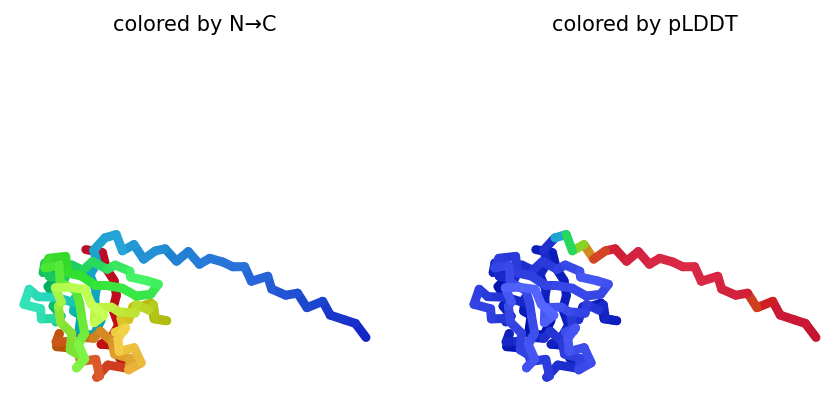

2023-03-01 16:55:18,229 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=89.1 pTM=0.799
2023-03-01 16:55:20,106 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=89.9 pTM=0.804 tol=1.18
2023-03-01 16:55:21,978 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=90.1 pTM=0.801 tol=0.28
2023-03-01 16:55:23,857 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=90.4 pTM=0.809 tol=0.447
2023-03-01 16:55:23,859 alphafold2_ptm_model_2_seed_000 took 7.5s (3 recycles)


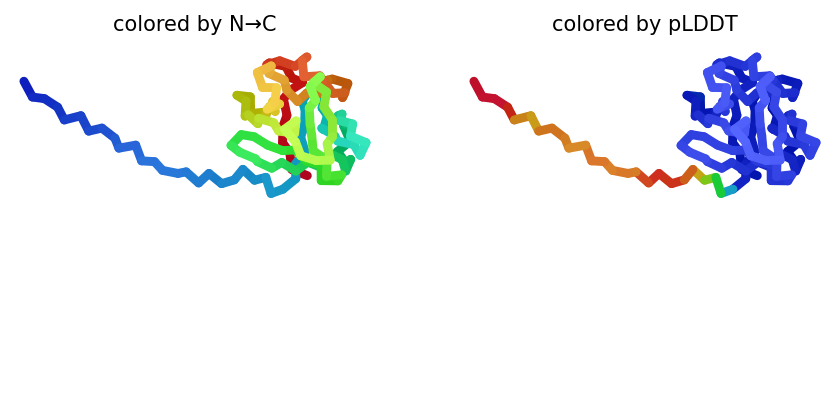

2023-03-01 16:55:26,165 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=88.2 pTM=0.803
2023-03-01 16:55:28,045 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=88.8 pTM=0.812 tol=1.88
2023-03-01 16:55:29,929 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=88.8 pTM=0.817 tol=0.407
2023-03-01 16:55:31,814 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=89.1 pTM=0.817 tol=0.653
2023-03-01 16:55:31,815 alphafold2_ptm_model_3_seed_000 took 7.5s (3 recycles)


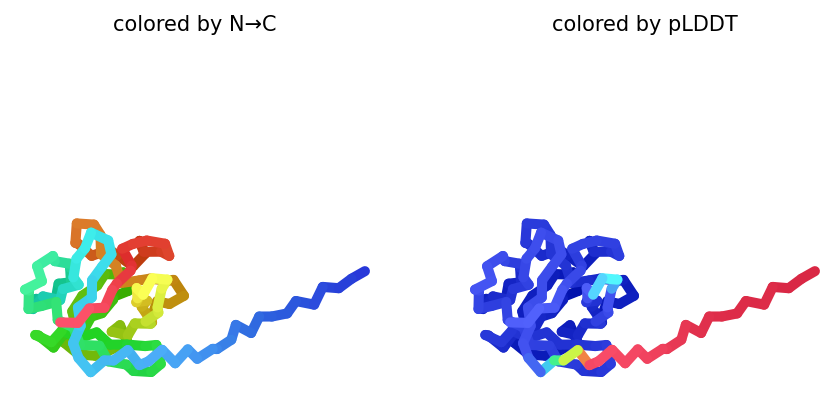

2023-03-01 16:55:33,968 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=88.3 pTM=0.808
2023-03-01 16:55:35,854 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=88.7 pTM=0.816 tol=3.83
2023-03-01 16:55:37,736 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=88.7 pTM=0.812 tol=1.01
2023-03-01 16:55:39,622 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=89.1 pTM=0.819 tol=0.287
2023-03-01 16:55:39,623 alphafold2_ptm_model_4_seed_000 took 7.5s (3 recycles)


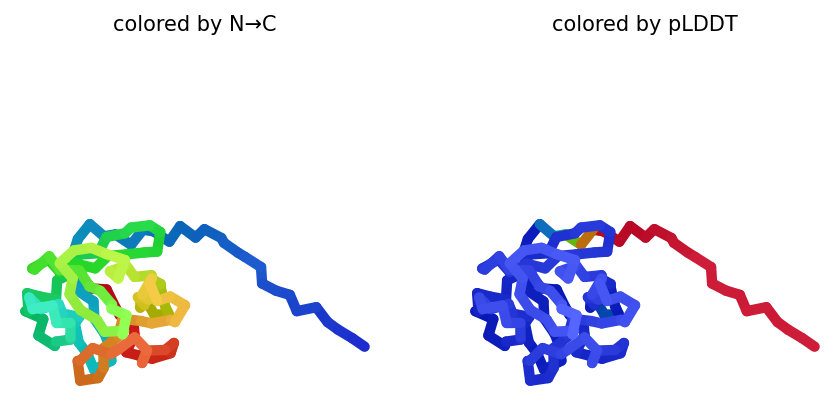

2023-03-01 16:55:41,787 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=88.5 pTM=0.807
2023-03-01 16:55:43,669 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=88.9 pTM=0.816 tol=0.887
2023-03-01 16:55:45,546 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=88.7 pTM=0.812 tol=0.357
2023-03-01 16:55:47,425 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=88.7 pTM=0.814 tol=0.385
2023-03-01 16:55:47,426 alphafold2_ptm_model_5_seed_000 took 7.5s (3 recycles)


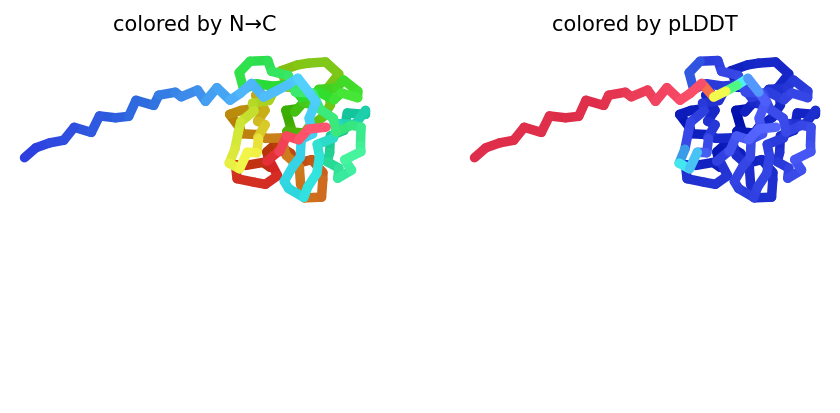

2023-03-01 16:55:47,712 reranking models by 'plddt' metric
2023-03-01 16:55:47,714 rank_001_alphafold2_ptm_model_2_seed_000 pLDDT=90.4 pTM=0.809
2023-03-01 16:55:47,714 rank_002_alphafold2_ptm_model_1_seed_000 pLDDT=89.6 pTM=0.806
2023-03-01 16:55:47,715 rank_003_alphafold2_ptm_model_4_seed_000 pLDDT=89.1 pTM=0.819
2023-03-01 16:55:47,715 rank_004_alphafold2_ptm_model_3_seed_000 pLDDT=89.1 pTM=0.817
2023-03-01 16:55:47,716 rank_005_alphafold2_ptm_model_5_seed_000 pLDDT=88.7 pTM=0.814
2023-03-01 16:55:49,824 Done


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

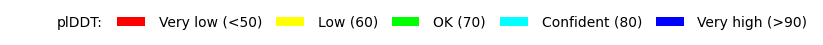


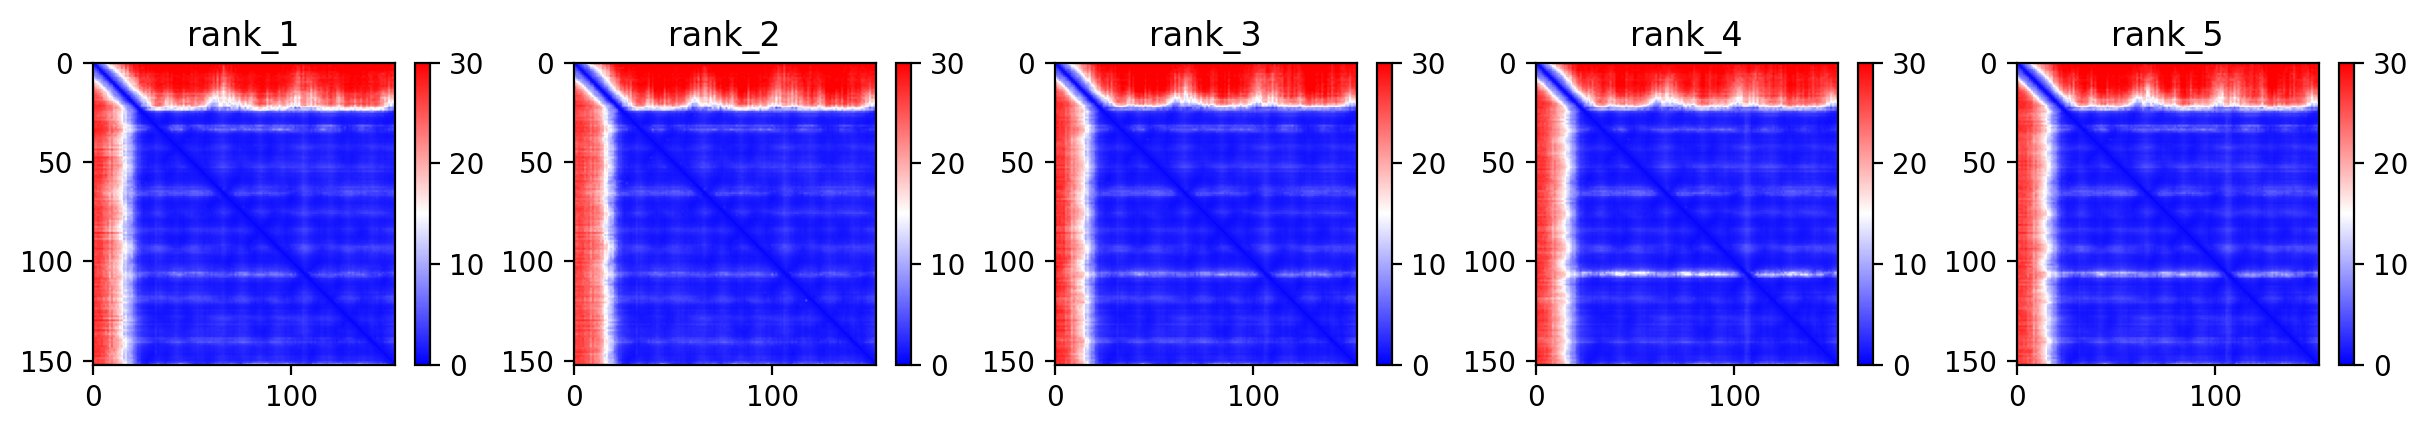
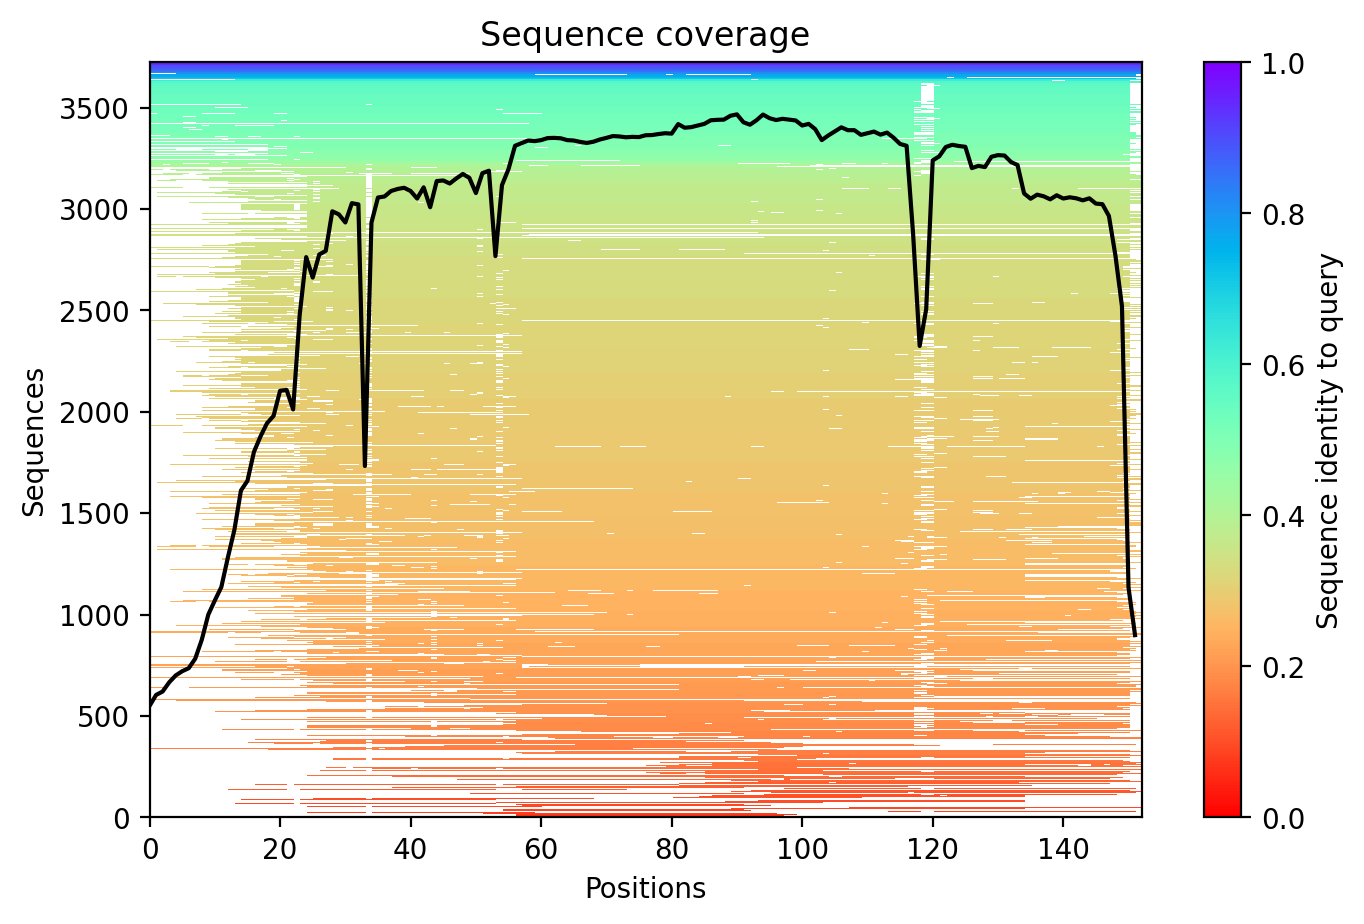
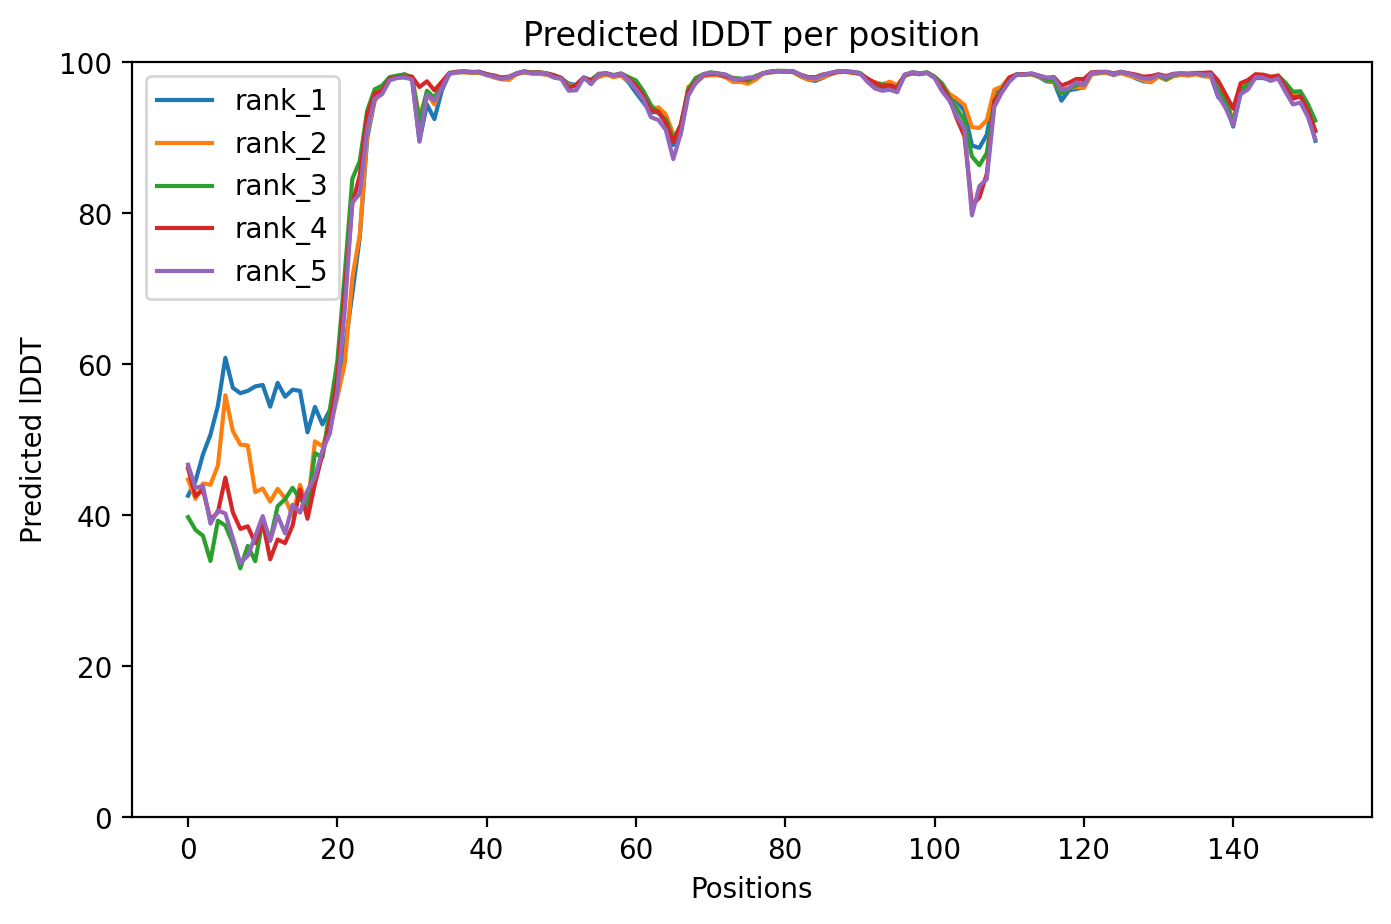

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jobname job_20_F_361f3
sequence MAEGEITTFTALTEKFNLPFGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV
length 152
2023-03-01 16:55:50,524 Running on GPU
2023-03-01 16:55:50,528 Found 4 citations for tools or databases
2023-03-01 16:55:50,528 Query 1/1: job_20_F_361f3 (length 152)


PENDING:   0%|          | 0/150 [elapsed: 00:00 remaining: ?]

2023-03-01 16:55:51,140 Sleeping for 5s. Reason: PENDING


RUNNING:   3%|▎         | 5/150 [elapsed: 00:06 remaining: 02:59]

2023-03-01 16:55:56,712 Sleeping for 8s. Reason: RUNNING


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:16 remaining: 00:00]


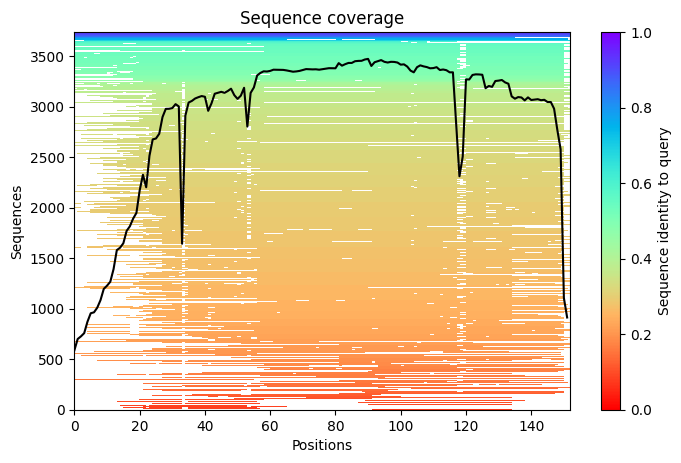

2023-03-01 16:56:07,176 Setting max_seq=512, max_extra_seq=3225
2023-03-01 16:56:33,493 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=88.7 pTM=0.801
2023-03-01 16:56:35,386 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=89.2 pTM=0.805 tol=3.73
2023-03-01 16:56:37,274 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=89.2 pTM=0.807 tol=0.505
2023-03-01 16:56:39,164 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=89.2 pTM=0.81 tol=0.644
2023-03-01 16:56:39,165 alphafold2_ptm_model_1_seed_000 took 25.7s (3 recycles)


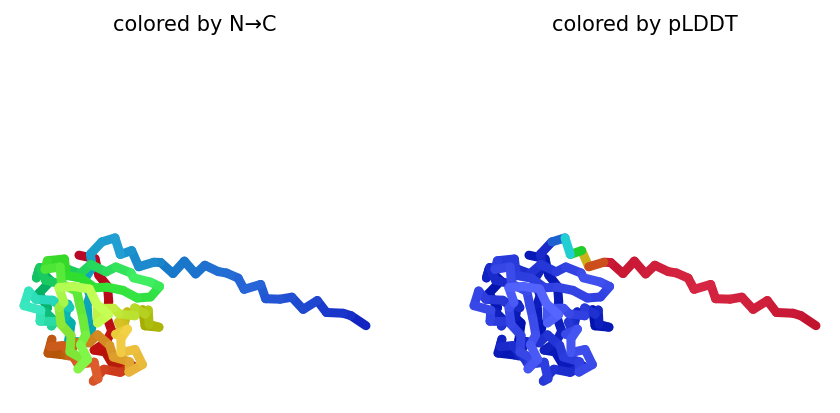

2023-03-01 16:56:41,314 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=88.4 pTM=0.791
2023-03-01 16:56:43,192 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=89.2 pTM=0.801 tol=0.965
2023-03-01 16:56:45,077 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=89.4 pTM=0.807 tol=0.228
2023-03-01 16:56:46,960 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=89.4 pTM=0.809 tol=0.195
2023-03-01 16:56:46,961 alphafold2_ptm_model_2_seed_000 took 7.5s (3 recycles)


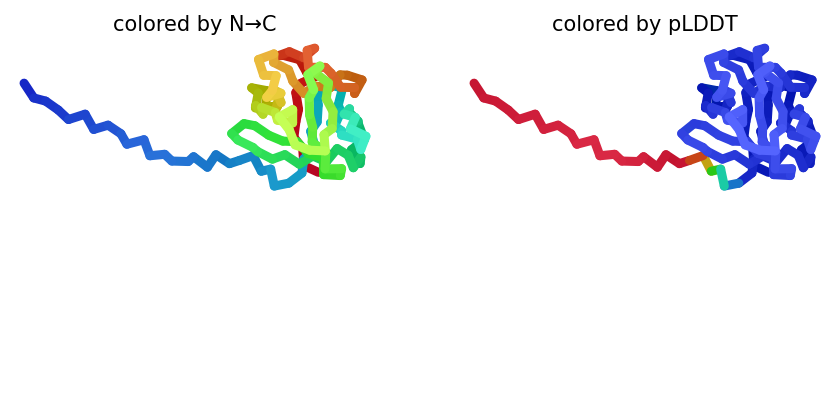

2023-03-01 16:56:49,122 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=88.5 pTM=0.808
2023-03-01 16:56:51,010 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=88.8 pTM=0.812 tol=1.52
2023-03-01 16:56:52,897 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=88.8 pTM=0.816 tol=1.04
2023-03-01 16:56:54,785 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=88.7 pTM=0.816 tol=0.601
2023-03-01 16:56:54,786 alphafold2_ptm_model_3_seed_000 took 7.6s (3 recycles)


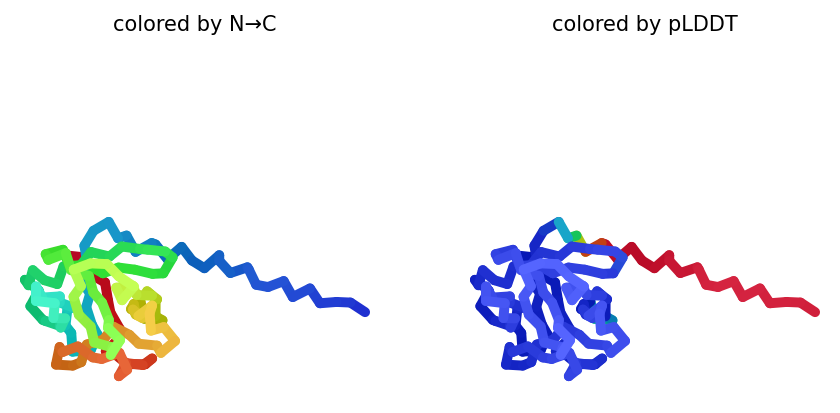

2023-03-01 16:56:56,945 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=88.6 pTM=0.812
2023-03-01 16:56:58,836 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=88.4 pTM=0.813 tol=4.69
2023-03-01 16:57:00,727 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=88.8 pTM=0.816 tol=0.554
2023-03-01 16:57:02,619 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=88.9 pTM=0.817 tol=0.451
2023-03-01 16:57:02,621 alphafold2_ptm_model_4_seed_000 took 7.6s (3 recycles)


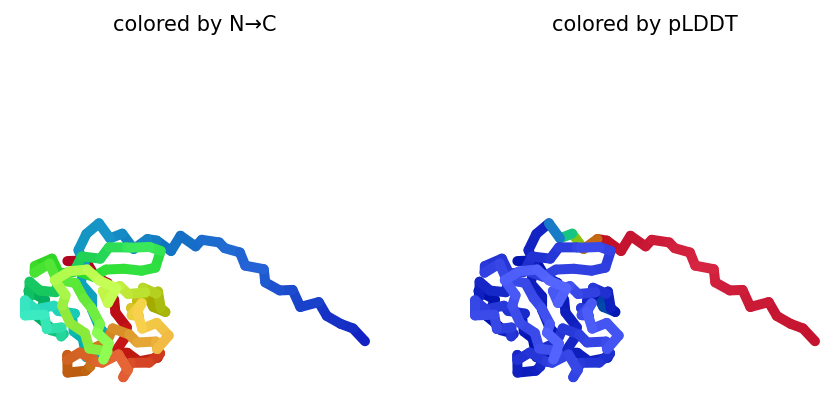

2023-03-01 16:57:04,782 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=88.2 pTM=0.81
2023-03-01 16:57:06,669 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=88.5 pTM=0.814 tol=2.15
2023-03-01 16:57:08,555 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=89.1 pTM=0.815 tol=3.59
2023-03-01 16:57:10,449 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=88.6 pTM=0.827 tol=3.01
2023-03-01 16:57:10,450 alphafold2_ptm_model_5_seed_000 took 7.6s (3 recycles)


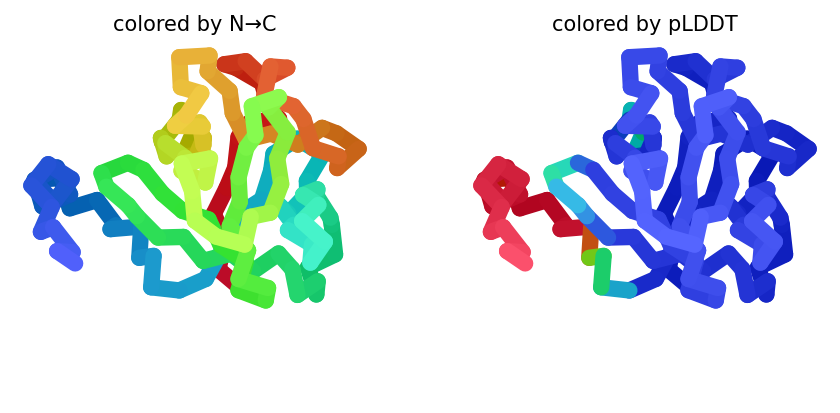

2023-03-01 16:57:10,729 reranking models by 'plddt' metric
2023-03-01 16:57:10,729 rank_001_alphafold2_ptm_model_2_seed_000 pLDDT=89.4 pTM=0.809
2023-03-01 16:57:10,731 rank_002_alphafold2_ptm_model_1_seed_000 pLDDT=89.2 pTM=0.81
2023-03-01 16:57:10,731 rank_003_alphafold2_ptm_model_4_seed_000 pLDDT=88.9 pTM=0.817
2023-03-01 16:57:10,732 rank_004_alphafold2_ptm_model_3_seed_000 pLDDT=88.7 pTM=0.816
2023-03-01 16:57:10,733 rank_005_alphafold2_ptm_model_5_seed_000 pLDDT=88.6 pTM=0.827
2023-03-01 16:57:12,818 Done


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

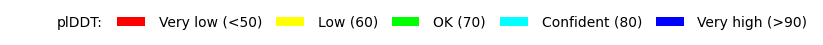


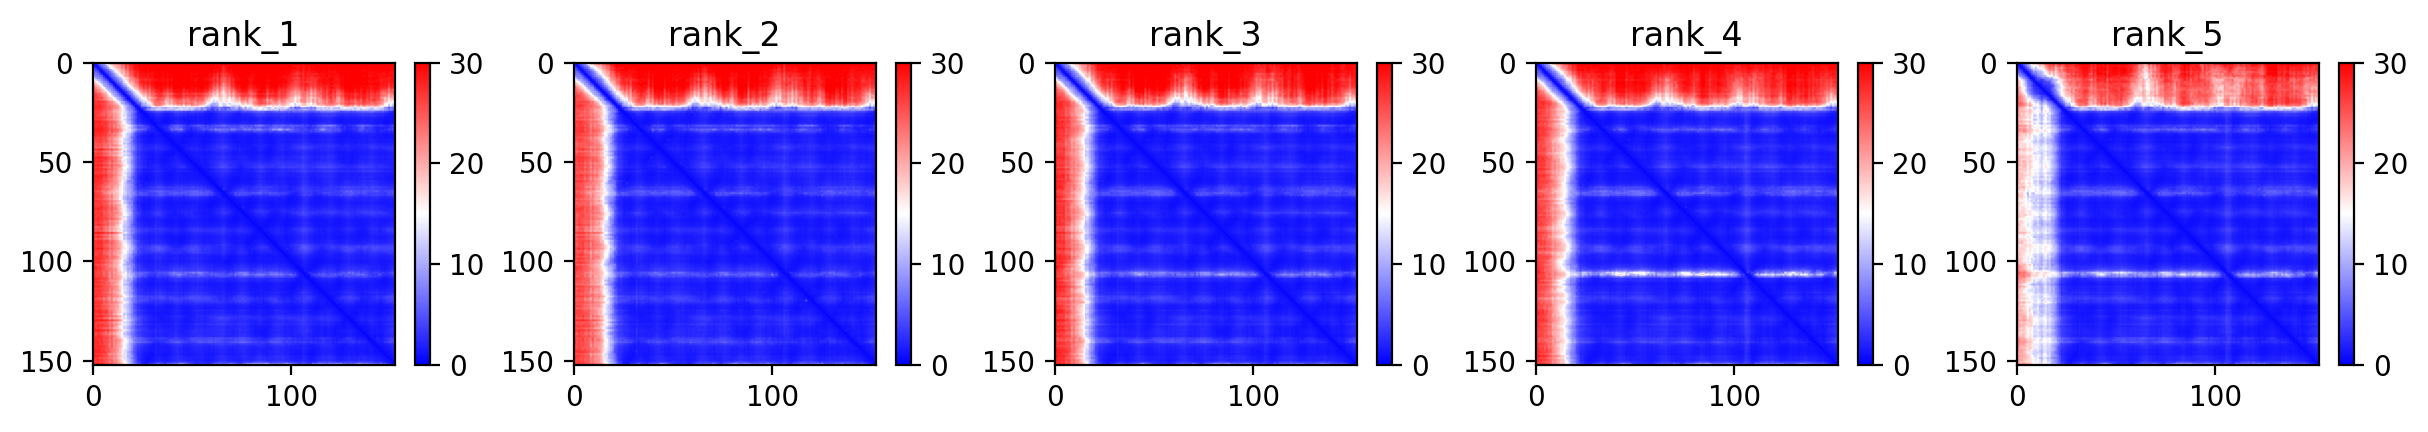
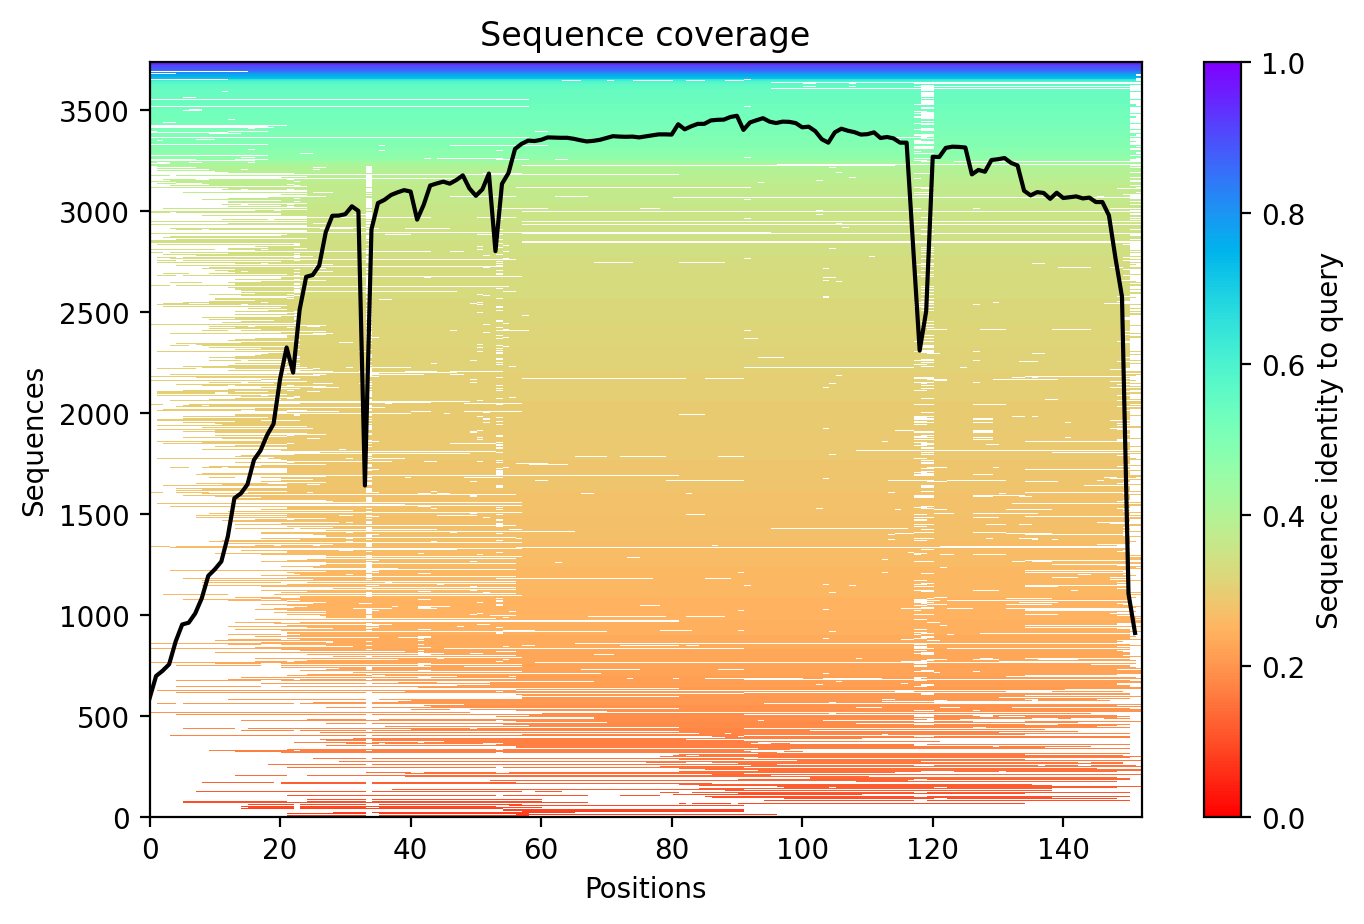
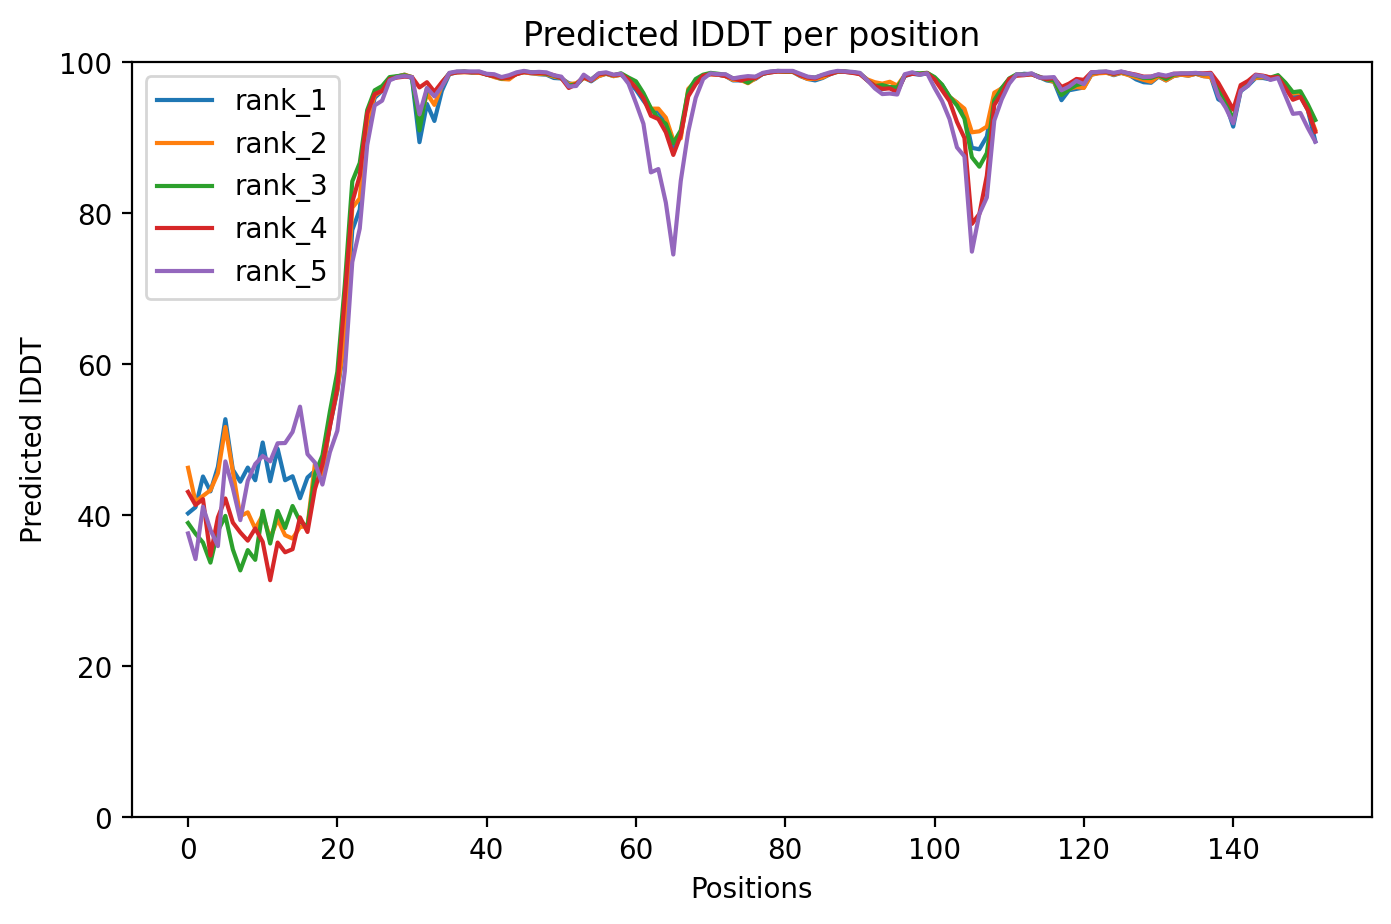

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

jobname job_25_Y_66746_0
sequence MAEGEITTFTALTEKFNLPPGNYKYPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV
length 152
2023-03-01 16:57:13,517 Running on GPU
2023-03-01 16:57:13,520 Found 4 citations for tools or databases
2023-03-01 16:57:13,521 Query 1/1: job_25_Y_66746_0 (length 152)


COMPLETE: 100%|██████████| 150/150 [elapsed: 00:01 remaining: 00:00]


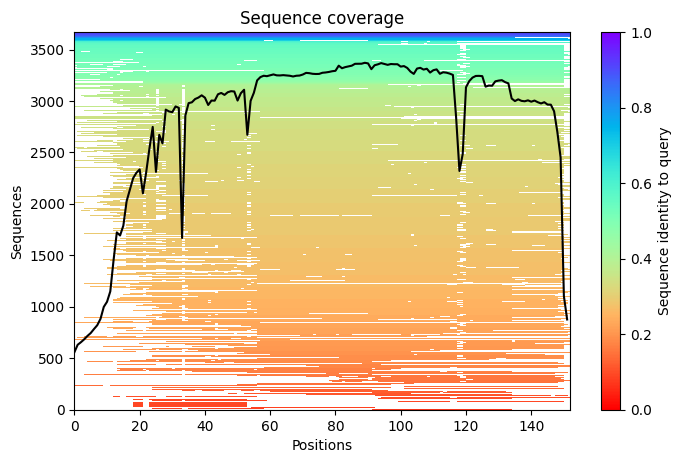

2023-03-01 16:57:16,023 Setting max_seq=512, max_extra_seq=3156
2023-03-01 16:57:40,721 alphafold2_ptm_model_1_seed_000 recycle=0 pLDDT=88.6 pTM=0.799
2023-03-01 16:57:42,608 alphafold2_ptm_model_1_seed_000 recycle=1 pLDDT=89.7 pTM=0.808 tol=2.45
2023-03-01 16:57:44,499 alphafold2_ptm_model_1_seed_000 recycle=2 pLDDT=89.6 pTM=0.809 tol=0.595
2023-03-01 16:57:46,387 alphafold2_ptm_model_1_seed_000 recycle=3 pLDDT=89.8 pTM=0.812 tol=0.638
2023-03-01 16:57:46,388 alphafold2_ptm_model_1_seed_000 took 23.9s (3 recycles)


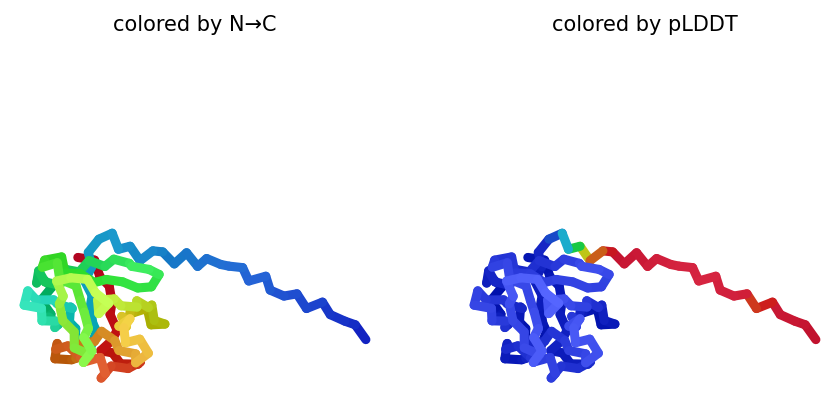

2023-03-01 16:57:48,532 alphafold2_ptm_model_2_seed_000 recycle=0 pLDDT=89.1 pTM=0.796
2023-03-01 16:57:50,413 alphafold2_ptm_model_2_seed_000 recycle=1 pLDDT=90.8 pTM=0.813 tol=1.35
2023-03-01 16:57:52,291 alphafold2_ptm_model_2_seed_000 recycle=2 pLDDT=90.6 pTM=0.812 tol=0.232
2023-03-01 16:57:54,172 alphafold2_ptm_model_2_seed_000 recycle=3 pLDDT=90.8 pTM=0.813 tol=0.123
2023-03-01 16:57:54,174 alphafold2_ptm_model_2_seed_000 took 7.5s (3 recycles)


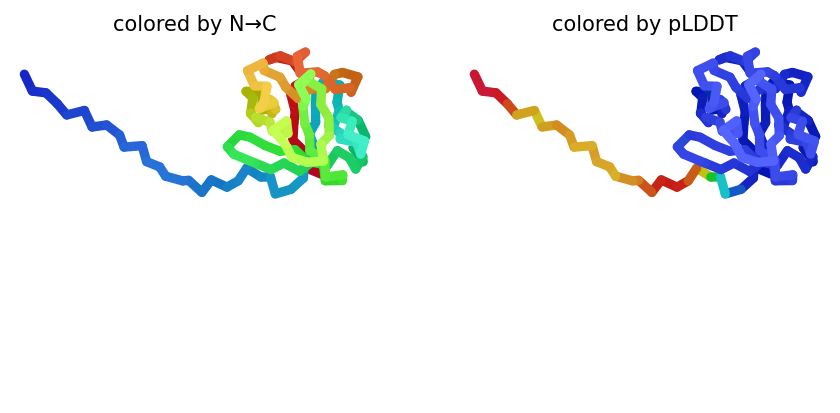

2023-03-01 16:57:56,324 alphafold2_ptm_model_3_seed_000 recycle=0 pLDDT=88.9 pTM=0.811
2023-03-01 16:57:58,210 alphafold2_ptm_model_3_seed_000 recycle=1 pLDDT=89.3 pTM=0.824 tol=1.22
2023-03-01 16:58:00,096 alphafold2_ptm_model_3_seed_000 recycle=2 pLDDT=89 pTM=0.828 tol=0.388
2023-03-01 16:58:01,984 alphafold2_ptm_model_3_seed_000 recycle=3 pLDDT=89.1 pTM=0.827 tol=0.735
2023-03-01 16:58:01,985 alphafold2_ptm_model_3_seed_000 took 7.5s (3 recycles)


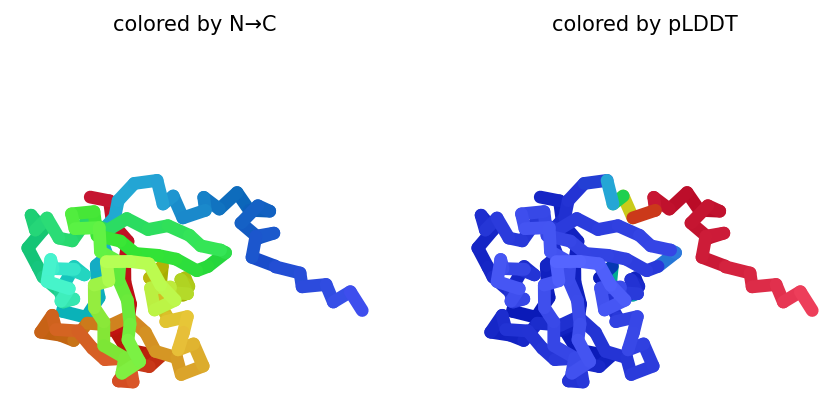

2023-03-01 16:58:04,131 alphafold2_ptm_model_4_seed_000 recycle=0 pLDDT=89.1 pTM=0.818
2023-03-01 16:58:06,016 alphafold2_ptm_model_4_seed_000 recycle=1 pLDDT=89.5 pTM=0.824 tol=1.02
2023-03-01 16:58:07,899 alphafold2_ptm_model_4_seed_000 recycle=2 pLDDT=89.3 pTM=0.823 tol=1.17
2023-03-01 16:58:09,785 alphafold2_ptm_model_4_seed_000 recycle=3 pLDDT=89.6 pTM=0.825 tol=0.218
2023-03-01 16:58:09,786 alphafold2_ptm_model_4_seed_000 took 7.5s (3 recycles)


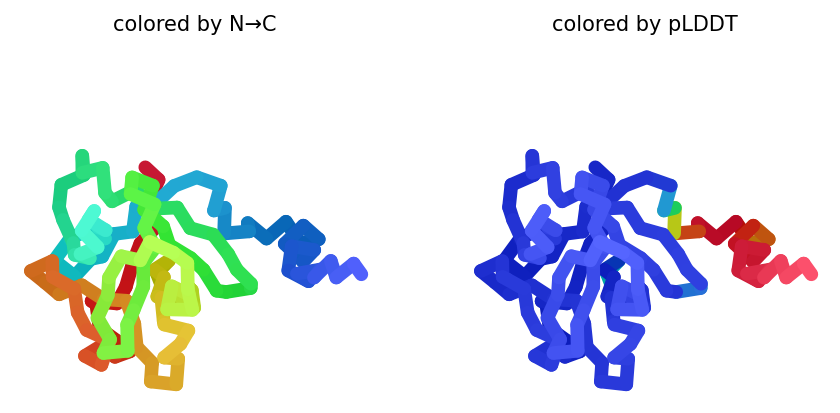

2023-03-01 16:58:11,936 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=89.4 pTM=0.811
2023-03-01 16:58:13,819 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=89.2 pTM=0.823 tol=1.57
2023-03-01 16:58:15,700 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=88.8 pTM=0.824 tol=1.09
2023-03-01 16:58:17,584 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=88.9 pTM=0.825 tol=0.371
2023-03-01 16:58:17,586 alphafold2_ptm_model_5_seed_000 took 7.5s (3 recycles)


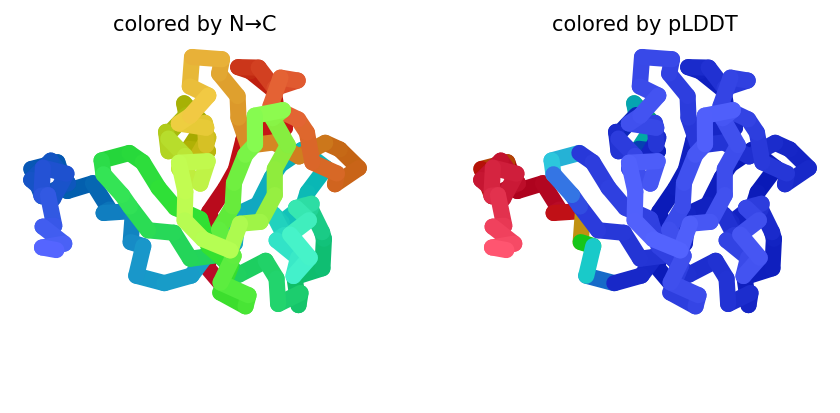

2023-03-01 16:58:17,858 reranking models by 'plddt' metric
2023-03-01 16:58:17,860 rank_001_alphafold2_ptm_model_2_seed_000 pLDDT=90.8 pTM=0.813
2023-03-01 16:58:17,861 rank_002_alphafold2_ptm_model_1_seed_000 pLDDT=89.8 pTM=0.812
2023-03-01 16:58:17,862 rank_003_alphafold2_ptm_model_4_seed_000 pLDDT=89.6 pTM=0.825
2023-03-01 16:58:17,863 rank_004_alphafold2_ptm_model_3_seed_000 pLDDT=89.1 pTM=0.827
2023-03-01 16:58:17,864 rank_005_alphafold2_ptm_model_5_seed_000 pLDDT=88.9 pTM=0.825
2023-03-01 16:58:20,118 Done


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

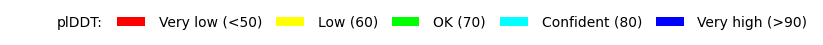


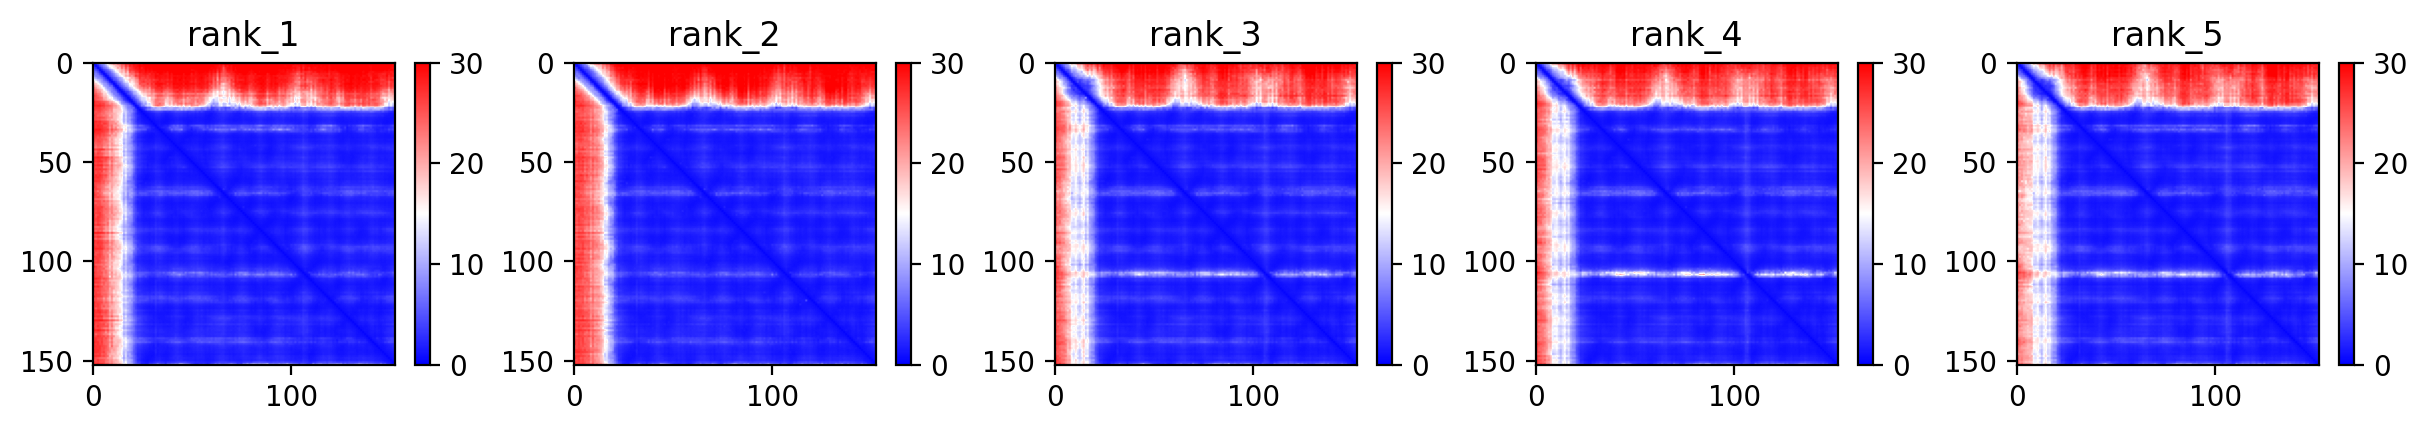
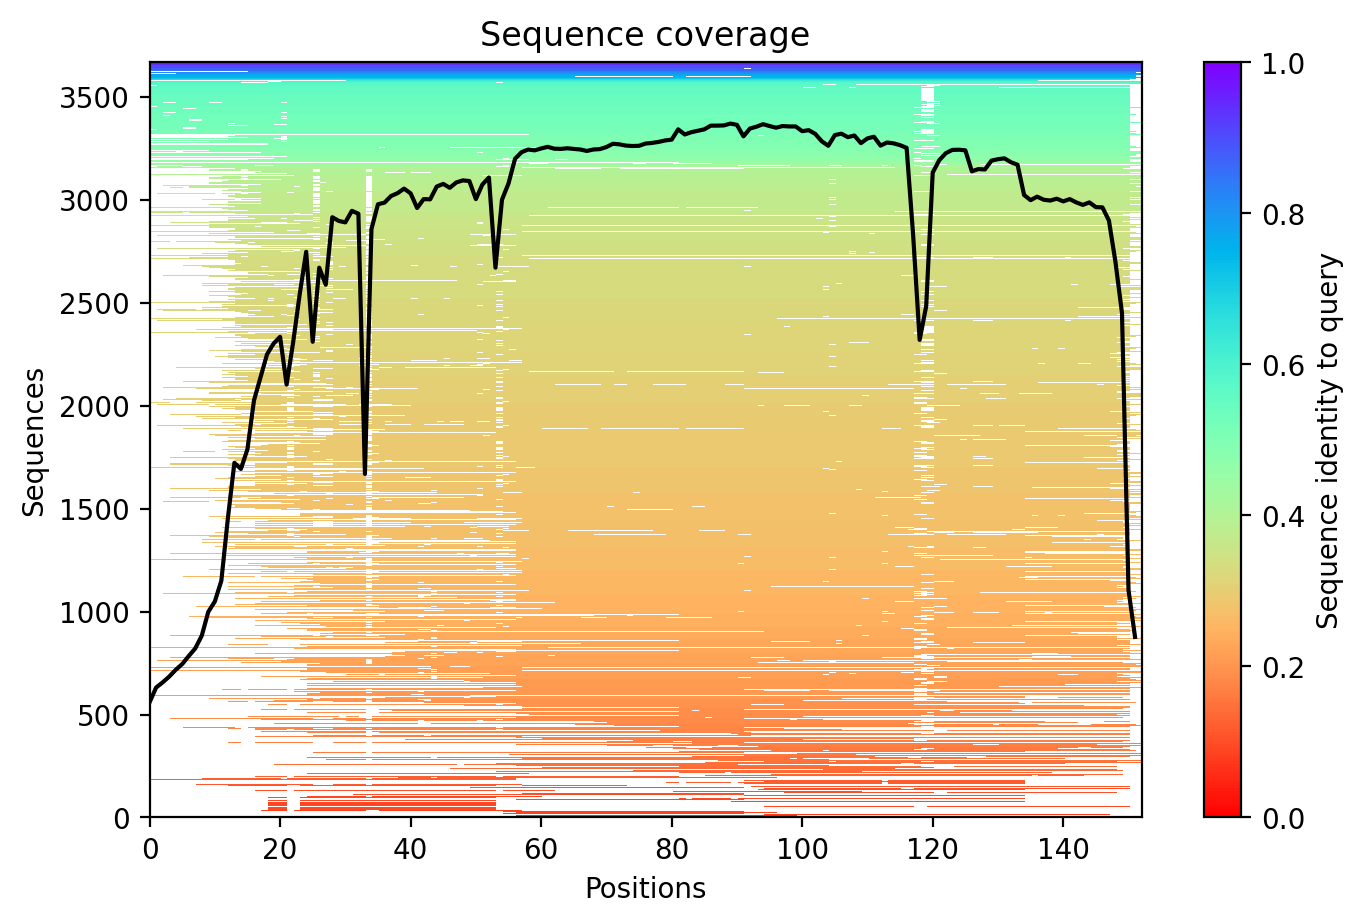
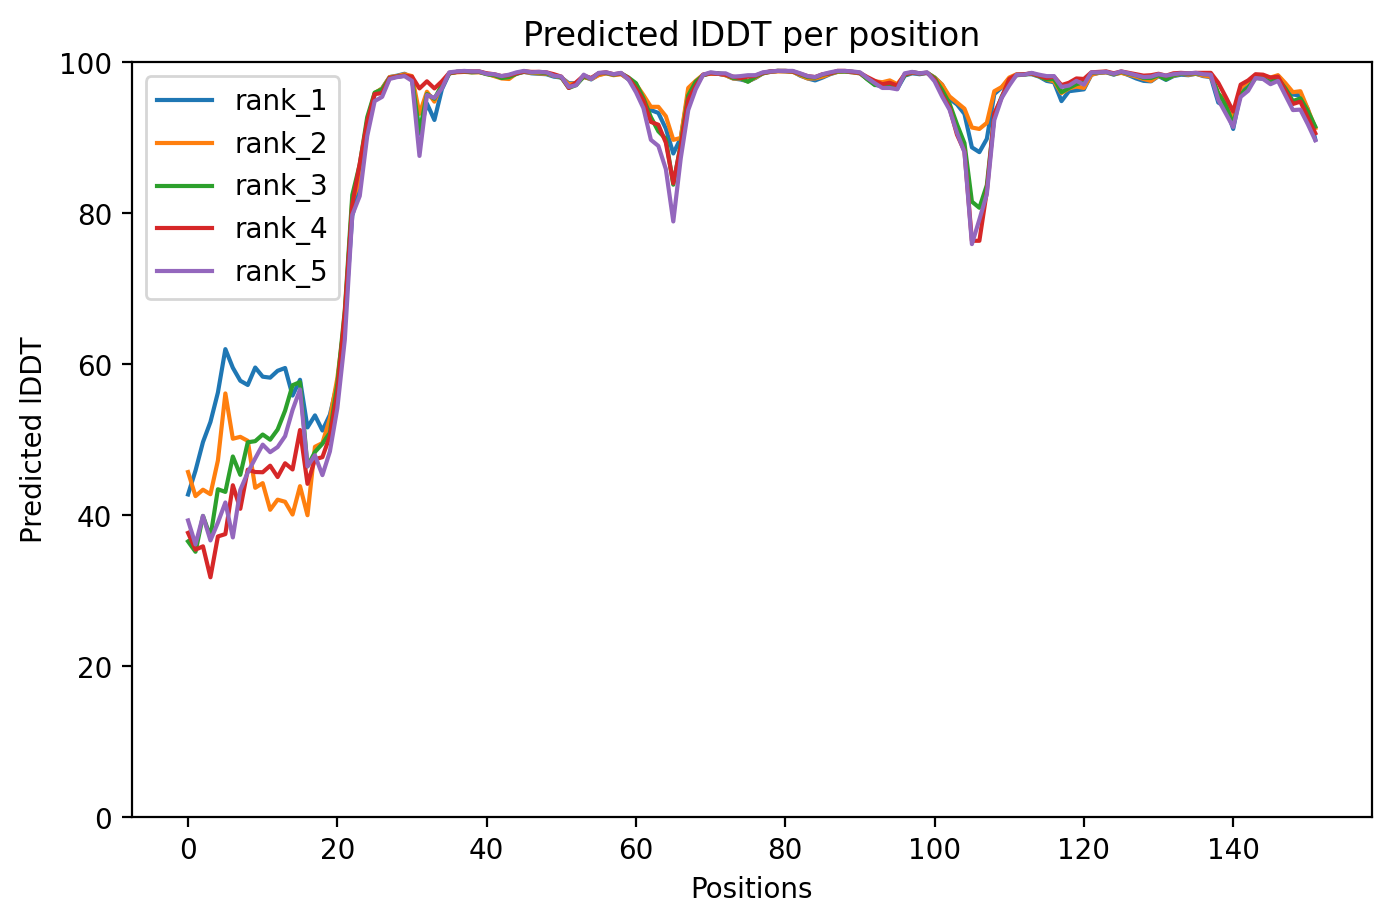

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import subprocess

def swap_amino_acid(seq, position, new_aa):
    """
    Swap an amino acid at a specified position for one specified by the user.
    :param seq: protein amino acid sequence
    :param position: position of the amino acid to be swapped (starting from 1)
    :param new_aa: new amino acid to be substituted at the specified position
    :return: altered protein sequence
    """
    aa_list = list(seq)
    aa_list[position - 1] = new_aa
    altered_seq = ''.join(aa_list)
    return altered_seq


# Read the original sequence from a text file
with open("original_sequence.txt", "r") as f:
    original_sequence = f.read()

# Read the variants table from a text file
with open("variants_table.txt", "r") as f:
    variants = [line.strip().split() for line in f]

# Apply the swap_amino_acid function to each variant and write an output file for each one
for variant in variants:
    position, new_aa = variant
    new_sequence = swap_amino_acid(original_sequence, int(position), new_aa)
    output_filename = f"{position}_{new_aa}.txt"
    with open(output_filename, "w") as f:
        f.write(new_sequence)
    
    # Call your other script with the new sequence as input
    query_sequence = new_sequence
    jobname = f"job_{position}_{new_aa}"
    from google.colab import files
    import os
    import re
    import hashlib
    import random

    from sys import version_info 
    python_version = f"{version_info.major}.{version_info.minor}"

    def add_hash(x,y):
      return x+"_"+hashlib.sha1(y.encode()).hexdigest()[:5]

    num_relax = 0
    template_mode = "none"


    use_amber = num_relax > 0

    query_sequence = "".join(query_sequence.split())

    basejobname = "".join(jobname.split())
    basejobname = re.sub(r'\W+', '', basejobname)
    jobname = add_hash(basejobname, query_sequence)

    def check(folder):
      if os.path.exists(folder):
        return False
      else:
        return True
    if not check(jobname):
      n = 0
      while not check(f"{jobname}_{n}"): n += 1
      jobname = f"{jobname}_{n}"

    os.makedirs(jobname, exist_ok=True)

    queries_path = os.path.join(jobname, f"{jobname}.csv")
    with open(queries_path, "w") as text_file:
      text_file.write(f"id,sequence\n{jobname},{query_sequence}")

    if template_mode == "pdb70":
      use_templates = True
      custom_template_path = None
    elif template_mode == "custom":
      custom_template_path = os.path.join(jobname,f"template")
      os.makedirs(custom_template_path, exist_ok=True)
      uploaded = files.upload()
      use_templates = True
      for fn in uploaded.keys():
        os.rename(fn,os.path.join(custom_template_path,fn))
    else:
      custom_template_path = None
      use_templates = False

    print("jobname",jobname)
    print("sequence",query_sequence)
    print("length",len(query_sequence.replace(":","")))

    msa_mode = "mmseqs2_uniref_env"
    pair_mode = "unpaired_paired"

    if "mmseqs2" in msa_mode:
      a3m_file = os.path.join(jobname,f"{jobname}.a3m")

    elif msa_mode == "custom":
      a3m_file = os.path.join(jobname,f"{jobname}.custom.a3m")
      if not os.path.isfile(a3m_file):
        custom_msa_dict = files.upload()
        custom_msa = list(custom_msa_dict.keys())[0]
        header = 0
        import fileinput
        for line in fileinput.FileInput(custom_msa,inplace=1):
          if line.startswith(">"):
             header = header + 1
          if not line.rstrip():
            continue
          if line.startswith(">") == False and header == 1:
             query_sequence = line.rstrip()
          print(line, end='')

        os.rename(custom_msa, a3m_file)
        queries_path=a3m_file
        print(f"moving {custom_msa} to {a3m_file}")
    
    else:
      a3m_file = os.path.join(jobname,f"{jobname}.single_sequence.a3m")
      with open(a3m_file, "w") as text_file:
        text_file.write(">1\n%s" % query_sequence)

    model_type = "auto"
    num_recycles = "auto"
    recycle_early_stop_tolerance = "auto"

    max_msa = "auto"
    num_seeds = 1
    use_dropout = False

    num_recycles = None if num_recycles == "auto" else int(num_recycles)
    recycle_early_stop_tolerance = None if recycle_early_stop_tolerance == "auto" else float(recycle_early_stop_tolerance)
    if max_msa == "auto": max_msa = None

    save_all = False
    save_recycles = False
    save_to_google_drive = False
    dpi = 200

    if save_to_google_drive:
      from pydrive.drive import GoogleDrive
      from pydrive.auth import GoogleAuth
      from google.colab import auth
      from oauth2client.client import GoogleCredentials
      auth.authenticate_user()
      gauth = GoogleAuth()
      gauth.credentials = GoogleCredentials.get_application_default()
      drive = GoogleDrive(gauth)
      print("You are logged into Google Drive and are good to go!")

    display_images = True

    import sys
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    from Bio import BiopythonDeprecationWarning
    warnings.simplefilter(action='ignore', category=BiopythonDeprecationWarning)
    from pathlib import Path
    from colabfold.download import download_alphafold_params, default_data_dir
    from colabfold.utils import setup_logging
    from colabfold.batch import get_queries, run, set_model_type
    from colabfold.plot import plot_msa_v2

    import os
    import numpy as np
    try:
      K80_chk = os.popen('nvidia-smi | grep "Tesla K80" | wc -l').read()
    except:
      K80_chk = "0"
      pass
    if "1" in K80_chk:
      print("WARNING: found GPU Tesla K80: limited to total length < 1000")
      if "TF_FORCE_UNIFIED_MEMORY" in os.environ:
        del os.environ["TF_FORCE_UNIFIED_MEMORY"]
      if "XLA_PYTHON_CLIENT_MEM_FRACTION" in os.environ:
        del os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]

    from colabfold.colabfold import plot_protein
    from pathlib import Path
    import matplotlib.pyplot as plt

    if use_amber and f"/usr/local/lib/python{python_version}/site-packages/" not in sys.path:
        sys.path.insert(0, f"/usr/local/lib/python{python_version}/site-packages/")

    def input_features_callback(input_features):  
      if display_images:    
        plot_msa_v2(input_features)
        plt.show()
        plt.close()

    def prediction_callback(protein_obj, length,
                            prediction_result, input_features, mode):
      model_name, relaxed = mode
      if not relaxed:
        if display_images:
          fig = plot_protein(protein_obj, Ls=length, dpi=150)
          plt.show()
          plt.close()

    result_dir = jobname
    if 'logging_setup' not in globals():
        setup_logging(Path(os.path.join(jobname,"log.txt")))
        logging_setup = True

    queries, is_complex = get_queries(queries_path)
    model_type = set_model_type(is_complex, model_type)

    if "multimer" in model_type and max_msa is not None:
      use_cluster_profile = False
    else:
      use_cluster_profile = True

    download_alphafold_params(model_type, Path("."))
    results = run(
        queries=queries,
        result_dir=result_dir,
        use_templates=use_templates,
        custom_template_path=custom_template_path,
        num_relax=num_relax,
        msa_mode=msa_mode,    
        model_type=model_type,
        num_models=5,
        num_recycles=num_recycles,
        recycle_early_stop_tolerance=recycle_early_stop_tolerance,
        num_seeds=num_seeds,
        use_dropout=use_dropout,
        model_order=[1,2,3,4,5],
        is_complex=is_complex,
        data_dir=Path("."),
        keep_existing_results=False,
        rank_by="auto",
        pair_mode=pair_mode,
        stop_at_score=float(100),
        prediction_callback=prediction_callback,
        dpi=dpi,
        zip_results=False,
        save_all=save_all,
        max_msa=max_msa,
        use_cluster_profile=use_cluster_profile,
        input_features_callback=input_features_callback,
        save_recycles=save_recycles,
    )
    results_zip = f"{jobname}.result.zip"
    os.system(f"zip -r {results_zip} {jobname}")

    import py3Dmol
    import glob
    import matplotlib.pyplot as plt
    from colabfold.colabfold import plot_plddt_legend
    from colabfold.colabfold import pymol_color_list, alphabet_list
    rank_num = 1
    color = "lDDT"
    show_sidechains = False
    show_mainchains = False

    tag = results["rank"][0][rank_num - 1]
    jobname_prefix = ".custom" if msa_mode == "custom" else ""
    pdb_filename = f"{jobname}/{jobname}{jobname_prefix}_unrelaxed_{tag}.pdb"
    pdb_file = glob.glob(pdb_filename)

    def show_pdb(rank_num=1, show_sidechains=False, show_mainchains=False, color="lDDT"):
      model_name = f"rank_{rank_num}"
      view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
      view.addModel(open(pdb_file[0],'r').read(),'pdb')

      if color == "lDDT":
        view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':90}}})
      elif color == "rainbow":
        view.setStyle({'cartoon': {'color':'spectrum'}})
      elif color == "chain":
        chains = len(queries[0][1]) + 1 if is_complex else 1
        for n,chain,color in zip(range(chains),alphabet_list,pymol_color_list):
           view.setStyle({'chain':chain},{'cartoon': {'color':color}})

      if show_sidechains:
        BB = ['C','O','N']
        view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                            {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
        view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                            {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
        view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                           {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})  
      if show_mainchains:
        BB = ['C','O','N','CA']
        view.addStyle({'atom':BB},{'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

      view.zoomTo()
      return view

    show_pdb(rank_num, show_sidechains, show_mainchains, color).show()
    if color == "lDDT":
      plot_plddt_legend().show()

    from IPython.display import display, HTML
    import base64
    from html import escape

    def image_to_data_url(filename):
      ext = filename.split('.')[-1]
      prefix = f'data:image/{ext};base64,'
      with open(filename, 'rb') as f:
        img = f.read()
      return prefix + base64.b64encode(img).decode('utf-8')

    pae = image_to_data_url(os.path.join(jobname,f"{jobname}{jobname_prefix}_pae.png"))
    cov = image_to_data_url(os.path.join(jobname,f"{jobname}{jobname_prefix}_coverage.png"))    
    plddt = image_to_data_url(os.path.join(jobname,f"{jobname}{jobname_prefix}_plddt.png"))
    display(HTML(f"""
    <style>
      img {{
        float:left;
      }}
      .full {{
        max-width:100%;
      }}
      .half {{
        max-width:50%;
      }}
      @media (max-width:640px) {{
        .half {{
          max-width:100%;
        }}
      }}
    </style>
    <div style="max-width:90%; padding:2em;">
      <h1>Plots for {escape(jobname)}</h1>
      <img src="{pae}" class="full" />
      <img src="{cov}" class="half" />
      <img src="{plddt}" class="half" />
    </div>
    """))

    if msa_mode == "custom":
      print("Don't forget to cite your custom MSA generation method.")

    files.download(f"{jobname}.result.zip")

    if save_to_google_drive == True and drive:
      uploaded = drive.CreateFile({'title': f"{jobname}.result.zip"})
      uploaded.SetContentFile(f"{jobname}.result.zip")
      uploaded.Upload()
      print(f"Uploaded {jobname}.result.zip to Google Drive with ID {uploaded.get('id')}")
